# Исследование интернет-магазина компьютерных игр Стримчик

**Описание проекта:**

Интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
______

**Цели исследования:**

1. Выявить закономерности, влияющие на успешность компьютерных игр, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
2. Проверить гипотезы:
- *Гипотеза №1:* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- *Гипотеза №2:* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
______

**Данные для анализа:**

1 файл *games.csv* с колонками:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные до 2016 года.
______

**План работы:**
1. Загрузка данных: чтение и первичное знакомство с данными.


2. Предобработка данных: 
- обработка пропусков, 
- обработка дубликатов,
- приведение типов данных, 
- обработка аномальных значений,
- создание новых столбцов.


3. Исследовательский анализ данных: 
- изменение количества выпускаемых игр в разные годы,
- изменение продаж по платформам,
- прогноз на 2017 год: выбор несколько потенциально прибыльных платформ,
- диаграмма размаха по глобальным продажам игр в разбивке по платформам,
- влияние продаж популярных платформ на отзывы пользователей и критиков,
- общее распределение игр по жанрам.


4. Портрет пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5),
- самые популярные жанры (топ-5),
- влияет ли рейтинг ESRB на продажи в отдельном регионе.


5. Проверка гипотез: проверка гипотез, чтобы найти точки роста для бизнеса.
- Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Подтвердилась.
- Гипотеза №2: Средние пользовательские рейтинги жанров Action и Sports разные. Подтвердилась.


6. Выводы.

## Загрузка данных

**1.1. Импортируем все библиотеки, необходимые для анализа.**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

**1.2. Считываем данные из csv-файла и сохраняем в датафрейм games.**

In [7]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

**1.3. Выведем первые и последние строки набора данных.**

In [9]:
display(games)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**1.4. Выведем основную информацию о датафрейме с помощью метода describe() и info().**

In [11]:
display(games.describe())
print()
print(games.info())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


**Вывод:** 
1. Общая информация: таблица *games* содержит *16715 строк, 11 столбцов*. Столбцы содержат как числовые, так и строковые данные.
2. Пропуски: наибольшее количество пропусков в столбцах с оценками (`Critic_Score` и `User_Score`) и в столбце `Rating`.
3. Типы данных: некоторые столбцы содержат значения типа object, которые нужно преобразовать в числовые типы для корректного анализа:
- `Year_of_Release`: float64 -> int
- `User_Score`: object -> float

## Предобработка данных

**2.1. Приведем названия столбцов к нижнему регистру.**

In [15]:
games.columns = games.columns.str.lower()

**2.2. Проверим данные на наличие пропусков.**

In [17]:
missing_values_count = games.isna().sum()
missing_values_percent = games.isna().mean() * 100

missing_data = pd.DataFrame({'Количество пропусков': missing_values_count, 'Процент пропусков': missing_values_percent}).sort_values(by='Количество пропусков', ascending=False)

missing_data

,Количество пропусков,Процент пропусков
critic_score,8578,51.319174
rating,6766,40.478612
user_score,6701,40.089740
year_of_release,269,1.609333
name,2,0.011965
genre,2,0.011965
platform,0,0.000000
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000


Удаляем пропуски в столбцах genre, name и year_of_release.
___
Причины пропусков:
- ошибки при вводе данных.
- отсутствие информации.

Также пропуски сами по себе могут быть значимыми и указывать, например, на низкий интерес к игре или другие специфические причины.
___
Причины удаления пропусков:
- незначительная доля от общего объема данных.
- невозможность корректной замены: genre, name - специфичные характеристики, которые сложно угадать без дополнительной информации.
- замена year_of_release на среднее или медианное значение может исказить временные ряды и тренды.

In [19]:
initial_row_count = 16715

games = games.dropna(subset=['genre', 'name', 'year_of_release'])

final_row_count = len(games)

removed_rows = initial_row_count - final_row_count

print(f"Количество удаленных строк: {removed_rows}")

Количество удаленных строк: 271


Оставляем пропуски в столбцах critic_score, user_score и rating, поскольку это усредненные значения выборки, а не набор случайных наблюдений. Заполнение пропусков усредненными показателями может привести к искажению данных и анализ получится некачественным. Также пропуски сами по себе могут быть значимыми и указывать, например, на низкий интерес к игре или другие специфические причины.

Подсчитаем количество и процент пропусков для каждого столбца. 

In [22]:
missing_values_count = games.isna().sum()
missing_values_percent = games.isna().mean() * 100

missing_data = pd.DataFrame({'Количество пропусков': missing_values_count, 'Процент пропусков': missing_values_percent}).sort_values(by='Количество пропусков', ascending=False)

missing_data

,Количество пропусков,Процент пропусков
critic_score,8461,51.453418
rating,6676,40.598395
user_score,6605,40.166626
name,0,0.000000
platform,0,0.000000
year_of_release,0,0.000000
genre,0,0.000000
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000


**2.3. Проверим данные на наличие дубликатов.**

Проверим данные на явные дубликаты.

In [25]:
print(games.duplicated().sum())

0


Проверим на неявные дубликаты по сабсету ('name', 'platform','year_of_release').

In [27]:
duplicates_subset = games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)

duplicated_rows = games[duplicates_subset]

duplicated_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Удалим строку с меньшим значением na_sales.

In [29]:
games = games.drop(duplicated_rows[duplicated_rows['na_sales'] == duplicated_rows['na_sales'].min()].index)

Проверим, что дубликаты удалены.

In [31]:
duplicates_subset = games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)

duplicated_rows = games[duplicates_subset]

duplicated_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**2.4. Преобразуем типы данных в столбцах year_of_release и user_score** для корректного анализа:
- year_of_release: float64 -> datetime
- user_score: object -> float

In [33]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y')
games['year_of_release'] = games['year_of_release'].dt.year

games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

print(games.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB
None


Преобразуем аббревиатуру 'tbd' в столбце user_score на nan, т.к. оценки должны иметь тип float64.

In [35]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)

**2.5. Проверим данные на наличие аномальных значений и выбросов.**

Для нахождения и анализа аномалий столбцов:

1. Числовые данные:
- Используем метод Z-оценок для выявления выбросов. Z-оценка показывает, насколько значение отклоняется от среднего в терминах стандартных отклонений. Формула: Z = (X−μ)/σ. Значения с Z-оценкой за пределами диапазона [-3, 3] часто считаются выбросами.
- Визуализируем данные с помощью boxplot для каждого числового столбца.
___
2. Категориальные данные:
- Выявляем редкие категории (категории с низкой частотой).
- Анализируем, являются ли редкие категории аномальными или корректными данными.

year_of_release:
  Количество аномальных значений: 188
  Процент аномальных значений: 1.14%

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64


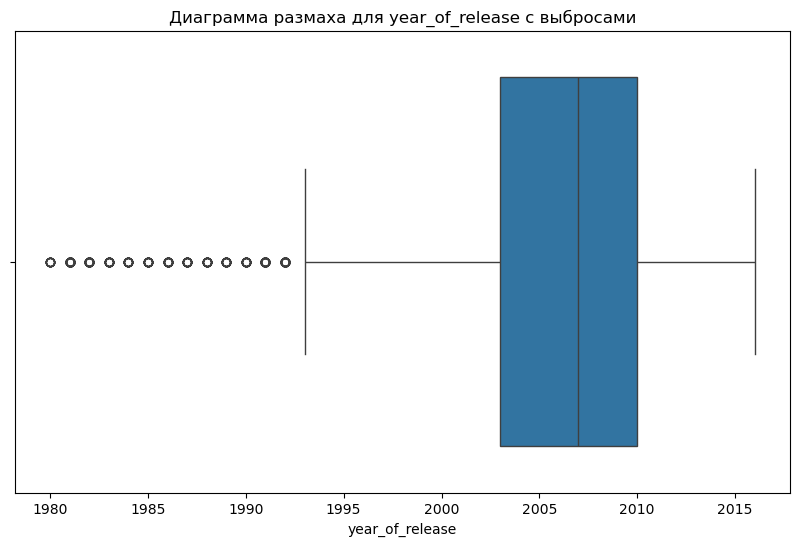

na_sales:
  Количество аномальных значений: 176
  Процент аномальных значений: 1.07%

count    16443.000000
mean         0.264028
std          0.818400
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64


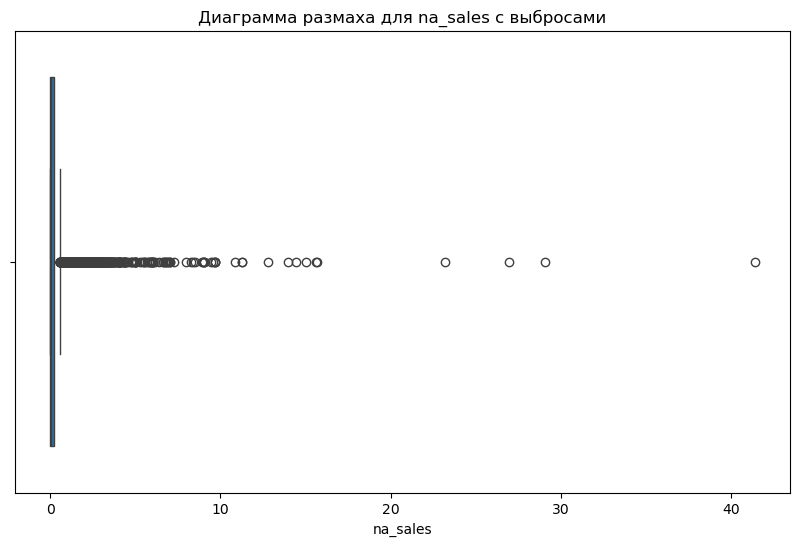

eu_sales:
  Количество аномальных значений: 217
  Процент аномальных значений: 1.32%

count    16443.000000
mean         0.145939
std          0.506731
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64


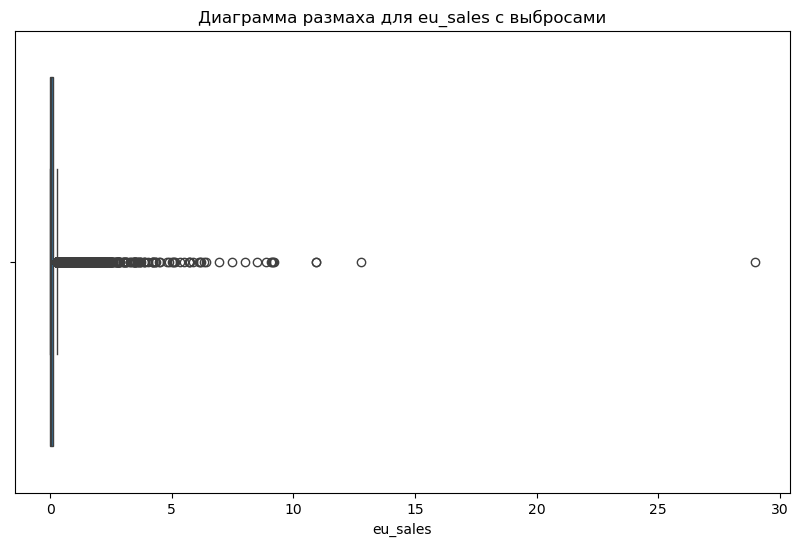

jp_sales:
  Количество аномальных значений: 236
  Процент аномальных значений: 1.44%

count    16443.000000
mean         0.078492
std          0.311109
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64


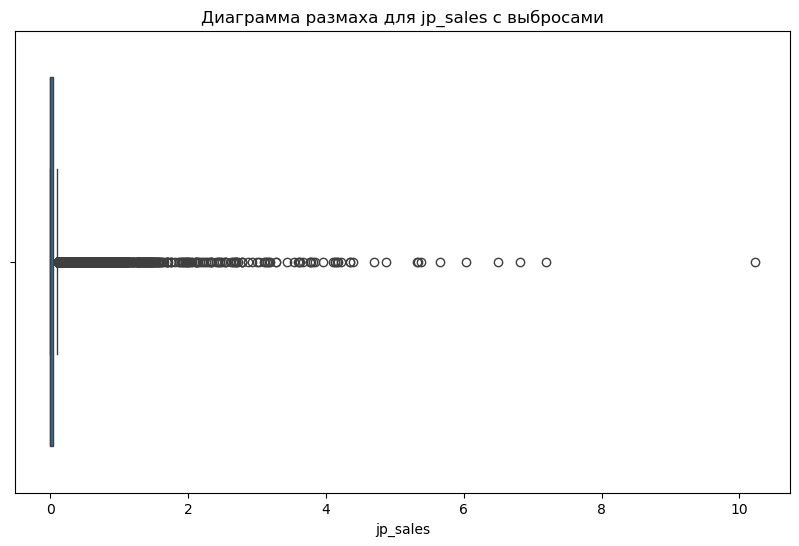

other_sales:
  Количество аномальных значений: 172
  Процент аномальных значений: 1.05%

count    16443.000000
mean         0.047597
std          0.188011
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64


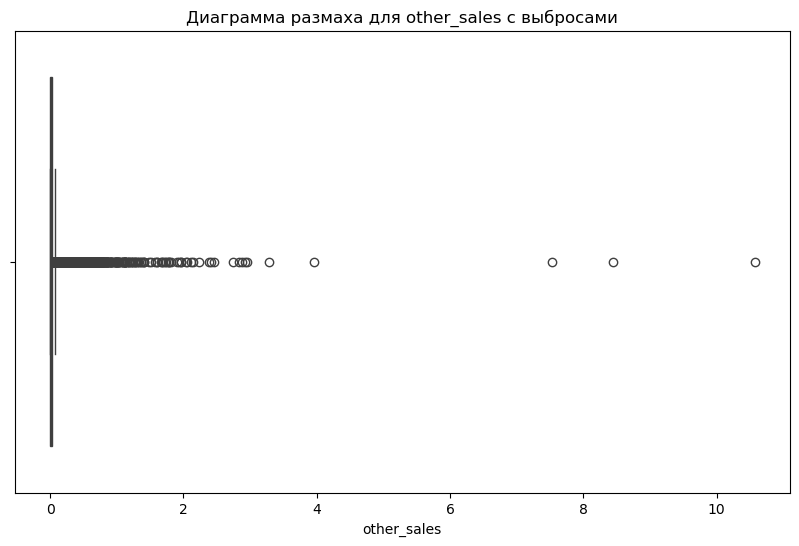

critic_score:
  Количество аномальных значений: 46
  Процент аномальных значений: 0.28%

count    7982.000000
mean       68.992608
std        13.920049
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64


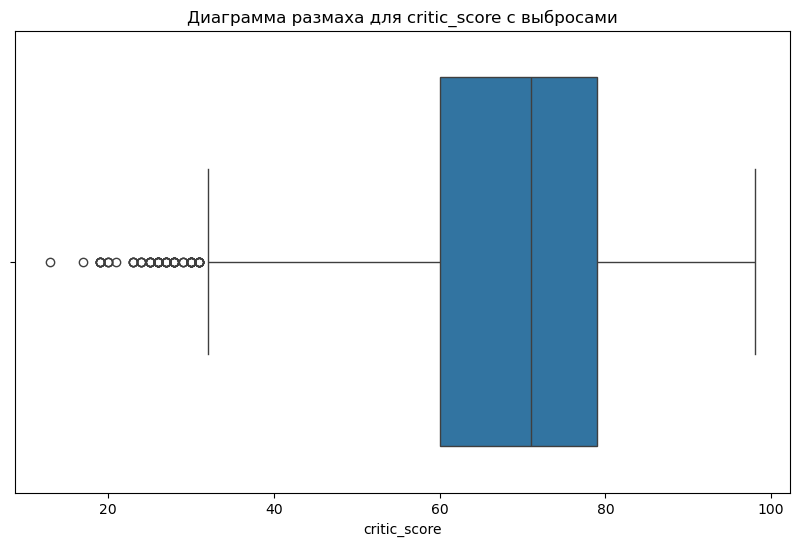

user_score:
  Количество аномальных значений: 102
  Процент аномальных значений: 0.62%

count    7462.000000
mean        7.126548
std         1.499429
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64


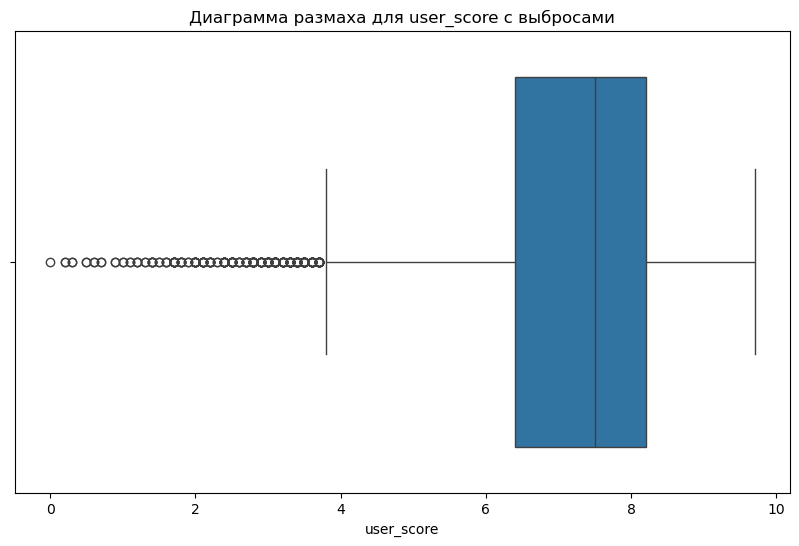

In [38]:
# Список числовых столбцов
numeric_columns = ['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']

# Анализ аномалий с использованием Z-оценок
for column in numeric_columns:
    mean = games[column].mean()
    std = games[column].std()
    # games['z_score'] = (games[column] - mean) / std

    # Значения с Z-оценкой за пределами диапазона [-3, 3] часто считаются выбросами.
    outliers = games[((games[column] - mean) / std < -3) | ((games[column] - mean) / std > 3)]

    # Подсчет количества и процента выбросов
    outliers_count = outliers.shape[0]
    outliers_percent = (outliers_count / games.shape[0]) * 100

    print(f'{column}:')
    print(f'  Количество аномальных значений: {outliers_count}')
    print(f'  Процент аномальных значений: {outliers_percent:.2f}%')
    print()
    
    # Описательная статистика для столбца 'column'
    print(games[column].describe())
    
    # Визуализация данных с выбросами
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=games[column])
    plt.title(f'Диаграмма размаха для {column} с выбросами')
    plt.show()  

**Вывод:** 
1. year_of_release: все ок, столбец содержит годы выпуска игр с 1980 по 2016. Есть старые игры, например, Super Mario Bros. от 1985 года.

2. na_sales, eu_sales, jp_sales, other_sales: продажи считаются в миллионах проданных копий, поэтому все ок. Много игр с нулевыми продажами (в Японии и в других странах - 50%).

3. critic_score: все ок, лежит в разумных пределах от 13 до 98. среднее значение - 70.

4. user_score: все ок, лежит в разумных пределах от 0 до 9.7. среднее значение - 7.12.

**2.6. Посчитаем суммарные продажи во всех регионах и добавим их в отдельный столбец.**

In [41]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


**Вывод:**

1. *Приведение типов данных:* преобразовали типы данных в столбцах year_of_release и user_score для корректного анализа:
- year_of_release: float64 -> datetime (int64)
- user_score: object -> float.

2. *Дубликаты:* была обнаружена и удалена 1 строка-дубликат по столбцам name, platform, year_of_release.


3. *Пропущенные значения:* 
- обнаруженные пропуски: обнаружены пропуски в 6 столбцах и примерно в 50% строк.
- удаленные строки: удалены 271 строка из 16715, что составляет 1.6%. Были удалены пропуски в столбцах genre, name и year_of_release. Количество пропущенных значений в этих столбцах не критично, а их замена могла бы привести к искажению данных.
- оставленные пропуски: пропуски в столбцах critic_score, user_score и rating были оставлены, поскольку это усредненные значения выборки, а не набор случайных наблюдений. Заполнение пропусков усредненными показателями может привести к искажению данных. Кроме того, пропуски сами по себе могут быть значимыми и указывать, например, на низкий интерес к игре или другие специфические причины.

4. *Аномальные значения:* нет.


5. *Новые столбцы:* добавлен 1 новый столбец total_sales с суммарными продажи во всех регионах.


После предобработки данных осталось 16443 строки и 12 столбцов, всего было удалено 272 из 16715 строк (1.6%).

## Исследовательский анализ данных

**3.1. Посмотрим, сколько игр выпускалось в разные годы.**

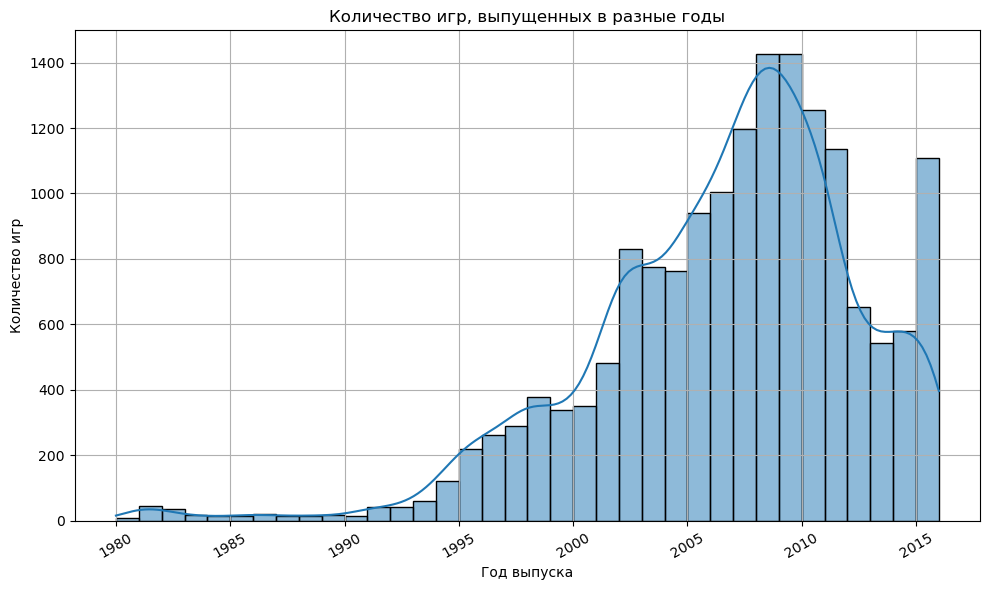

In [45]:
# Создание гистограммы с использованием seaborn
plt.figure(figsize=(10, 6))

# Построение гистограммы с использованием seaborn
sns.histplot(games['year_of_release'], bins=36, kde=True)

plt.title('Количество игр, выпущенных в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')

plt.xticks(rotation=30)

plt.grid(True)
plt.tight_layout()
plt.show()

**Вывод:**

1. В период с 1980 по 1990 год выпускалось относительно небольшое количество игр. 
2. С 1991 года начинается постепенный рост количества выпускаемых игр.
3. В начале 2000-х количество выпускаемых игр продолжает быстро расти. Пик приходится на 2008 и 2009 год (около 1400 игр).
4. В период с 2010 по 2011 год количество выпускаемых игр на платформах начинает снижаться с некоторыми колебаниями. Скорее всего это связано с ростом мобильных игр (гипер-казуалок).

**3.2. Посмотрим, как менялись продажи по платформам:**
- определим платформы с наибольшими суммарными продажами,
- отфильтруем топ-10 платформ,
- построим распределение продаж по годам для каждой платформы.

Продажи по платформам: platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


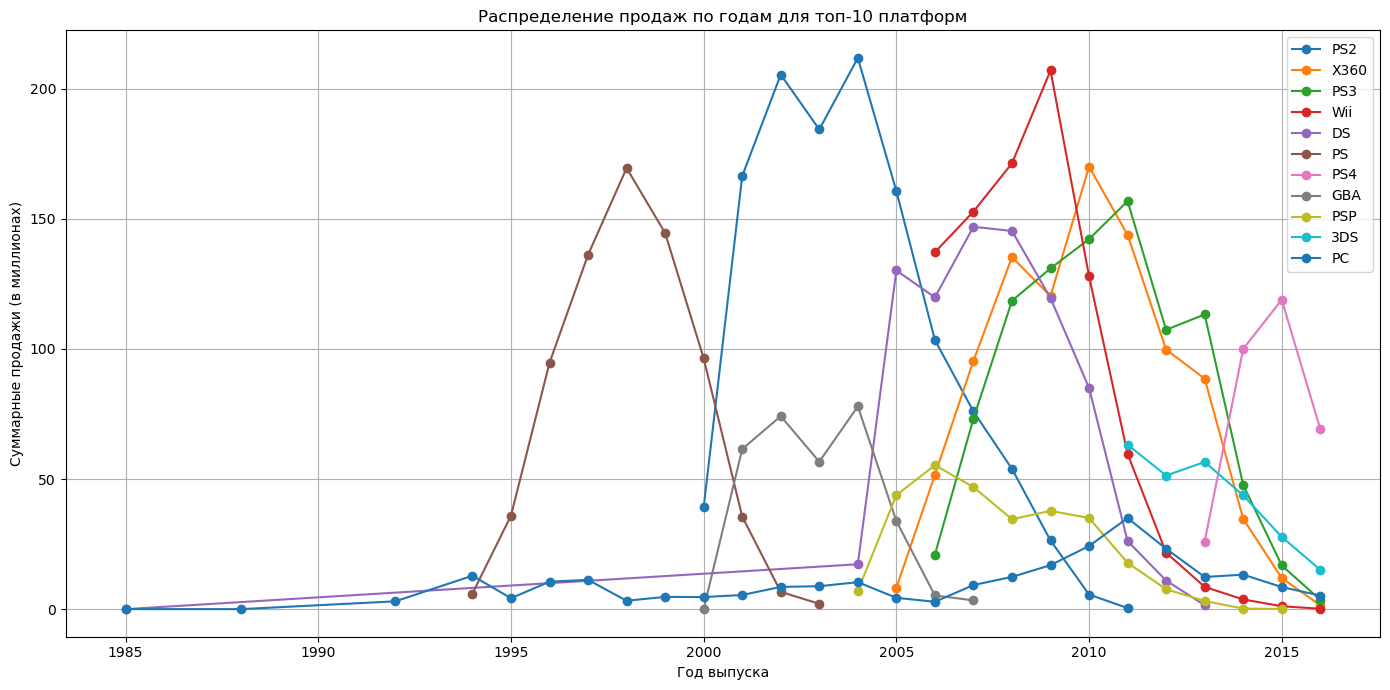

In [48]:
platforms_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print('Продажи по платформам:', platforms_sales)

top_platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(11)

top_games = games[games['platform'].isin(top_platforms.index)]
 
plt.figure(figsize=(14, 7))

for platform in top_platforms.index:
    platform_data = top_games[top_games['platform'] == platform]
    platform_sales = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(platform_sales.index, platform_sales.values, marker='o', label=platform)

plt.title('Распределение продаж по годам для топ-10 платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (в миллионах)')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

Посмотрим на продолжительность жизни игровых платформ и их изменении со временем.

In [50]:
platform_lifecycle = games.groupby('platform')['year_of_release'].agg(['min', 'max'])

platform_lifecycle['lifetime'] = platform_lifecycle['max'] - platform_lifecycle['min']

display(platform_lifecycle.sort_values(by='lifetime', ascending=False))

print(platform_lifecycle.describe())

,min,max,lifetime
platform,,,
PC,1985,2016,31
DS,1985,2013,28
GB,1988,2001,13
X360,2005,2016,11
PSP,2004,2015,11
PS2,2000,2011,11
NES,1983,1994,11
DC,1998,2008,10
Wii,2006,2016,10


               min          max   lifetime
count    31.000000    31.000000  31.000000
mean   1997.645161  2005.258065   7.612903
std       9.094131     9.273503   6.998464
min    1980.000000  1989.000000   0.000000
25%    1992.500000  1996.000000   3.000000
50%    1996.000000  2007.000000   6.000000
75%    2004.500000  2016.000000  10.000000
max    2013.000000  2016.000000  31.000000


**Вывод:**

1. PS2, X360, PS3, Wii — самые популярные платформы по продажам.
2. PC и DS - имеют самый долгий жизненный цикл. В среднем жизненный цикл игровой платформы - 7-8 лет.
2. Как только на рынок выходят новые версии с улучшенными характеристиками, платформы старого поколения начинают терять популярность. PS -> PS2 -> PS3 -> PS4. XB -> X360 -> XOne. Wii -> WiiU.

**3.3. Построим прогноз на 2017 год на основе данных за актуальный период. Выберем несколько потенциально прибыльных платформ.**

Цель проекта — найти закономерности, определяющие успешность игр, поэтому для анализа будем использовать данные за актуальный период. В нашем случае актуальный период начинается с 2013 года: семейства Playstation, XBox, Wii выпустили новые поколения платформ.

- отфильтруем данные по актуальному периоду (2013-2016),
- посчитаем сумму продаж по платформам за актуальный период,
- построим распределение продаж по годам для каждой платформы.

Количество игр за 2013-2016: 2233
platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64


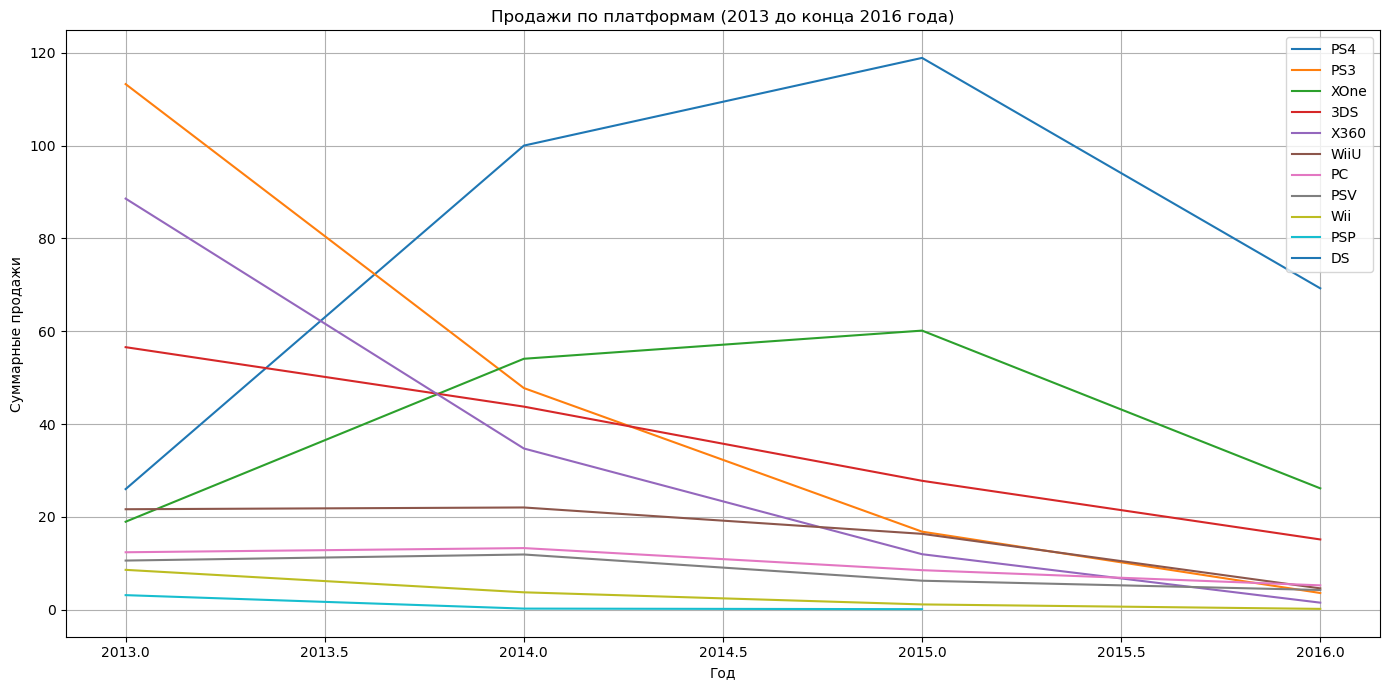

In [53]:
new_games = games[games['year_of_release'] >= 2013]

print('Количество игр за 2013-2016:', len(new_games))

platform_sales = new_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print(platform_sales)

plt.figure(figsize=(14, 7))
for platform in platform_sales.index:
    platform_data = new_games[new_games['platform'] == platform]
    platform_sales = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(platform_sales.index, platform_sales.values, label=platform)

plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.title('Продажи по платформам (2013 до конца 2016 года)')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

**Вывод:**

1. Растущие и потенциально прибыльные платформы: платформы нового поколения PS4 и XOne.
2. Идущие на спад платформы: платформы старого поколения PS3, X360 и 3DS.
3. Хотя продажи ниже, чем у консолей, ПК (PC) остается важной и стабильной платформой.

**3.4. Давайте построим диаграмму размаха по глобальным продажам игр в разбивке по платформам.**

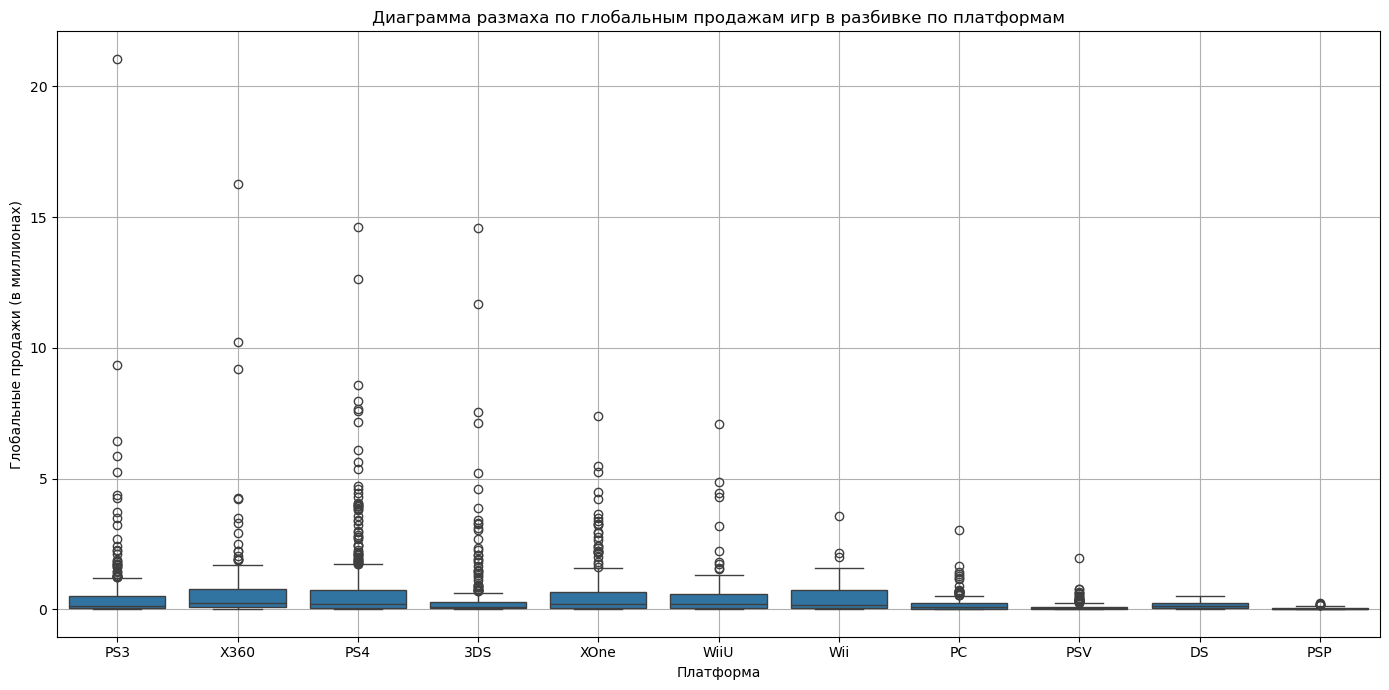

In [56]:
plt.figure(figsize=(14, 7))

sns.boxplot(data=new_games, x='platform', y='total_sales')

plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (в миллионах)')

plt.grid(True)
plt.tight_layout()
plt.show()

Увеличим масштаб и построим диаграммы размаха с платформами, отсортированными по убыванию медианы продаж.

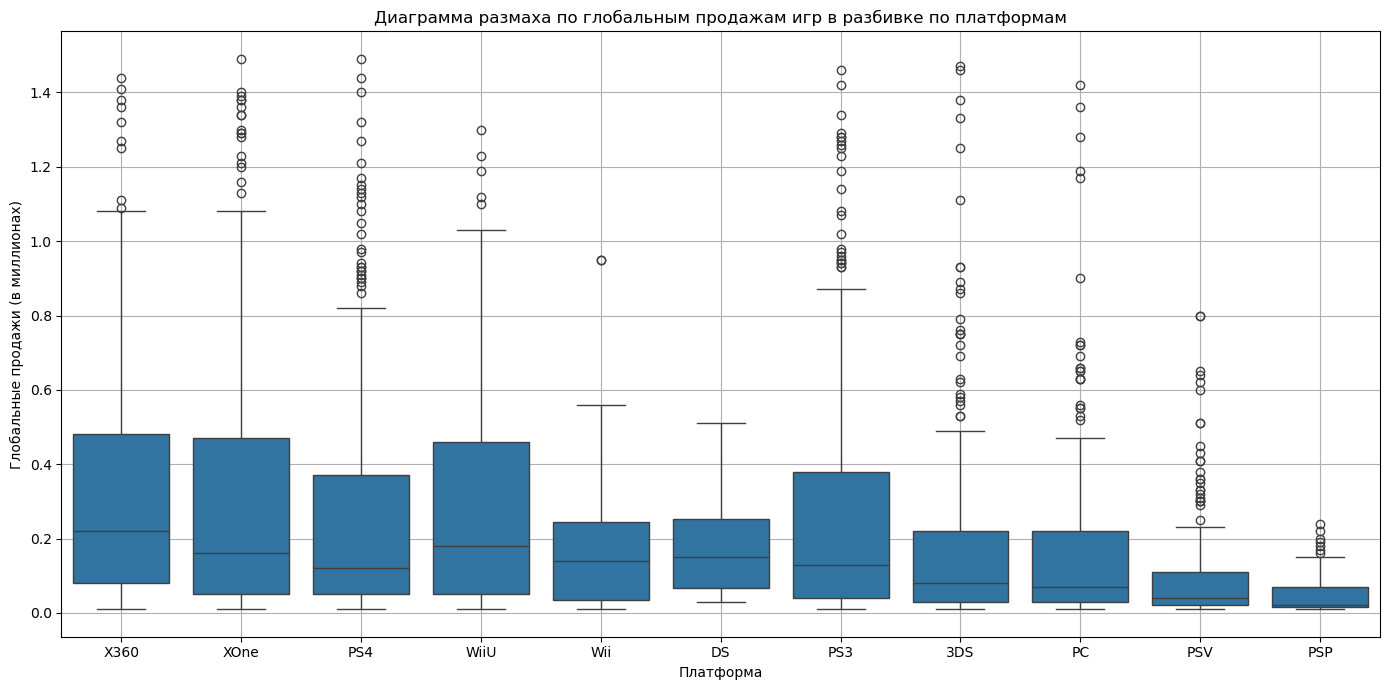

In [58]:
plt.figure(figsize=(14, 7))

platform_medians = new_games.groupby('platform')['total_sales'].median()

sorted_platforms = platform_medians.sort_values(ascending=False).index

sns.boxplot(data=new_games[new_games['total_sales'] < 1.5], x='platform', y='total_sales', order=sorted_platforms)

plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (в миллионах)')

plt.grid(True)
plt.tight_layout()
plt.show()

График мало информативен. Посмотрим данные по продажам, применив метод describe() ко всем платформам.

In [60]:
total_sales_description = new_games.groupby('platform')['total_sales'].describe()

total_sales_description = total_sales_description.sort_values(by='50%', ascending=False)

total_sales_description

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
X360,186.0,0.735484,1.663275,0.01,0.0800,0.265,0.7950,16.27
XOne,247.0,0.645020,1.036139,0.01,0.0600,0.220,0.6850,7.39
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05


**Вывод:**
Растущие и потенциально прибыльные платформы: платформы нового поколения XOne, PS4, WiiU и PC, который стабилен на протяжении всего времени и стоит особняком. Эти платформы имеют высокие средние и максимальные продажи, что делает их привлекательными для выпуска новых игр. 

**3.5. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**


XOne - Корреляция между оценками критиков и продажами: 0.42
XOne - Корреляция между оценками пользователей и продажами: -0.07

PS4 - Корреляция между оценками критиков и продажами: 0.41
PS4 - Корреляция между оценками пользователей и продажами: -0.03

WiiU - Корреляция между оценками критиков и продажами: 0.38
WiiU - Корреляция между оценками пользователей и продажами: 0.42

PC - Корреляция между оценками критиков и продажами: 0.20
PC - Корреляция между оценками пользователей и продажами: -0.09


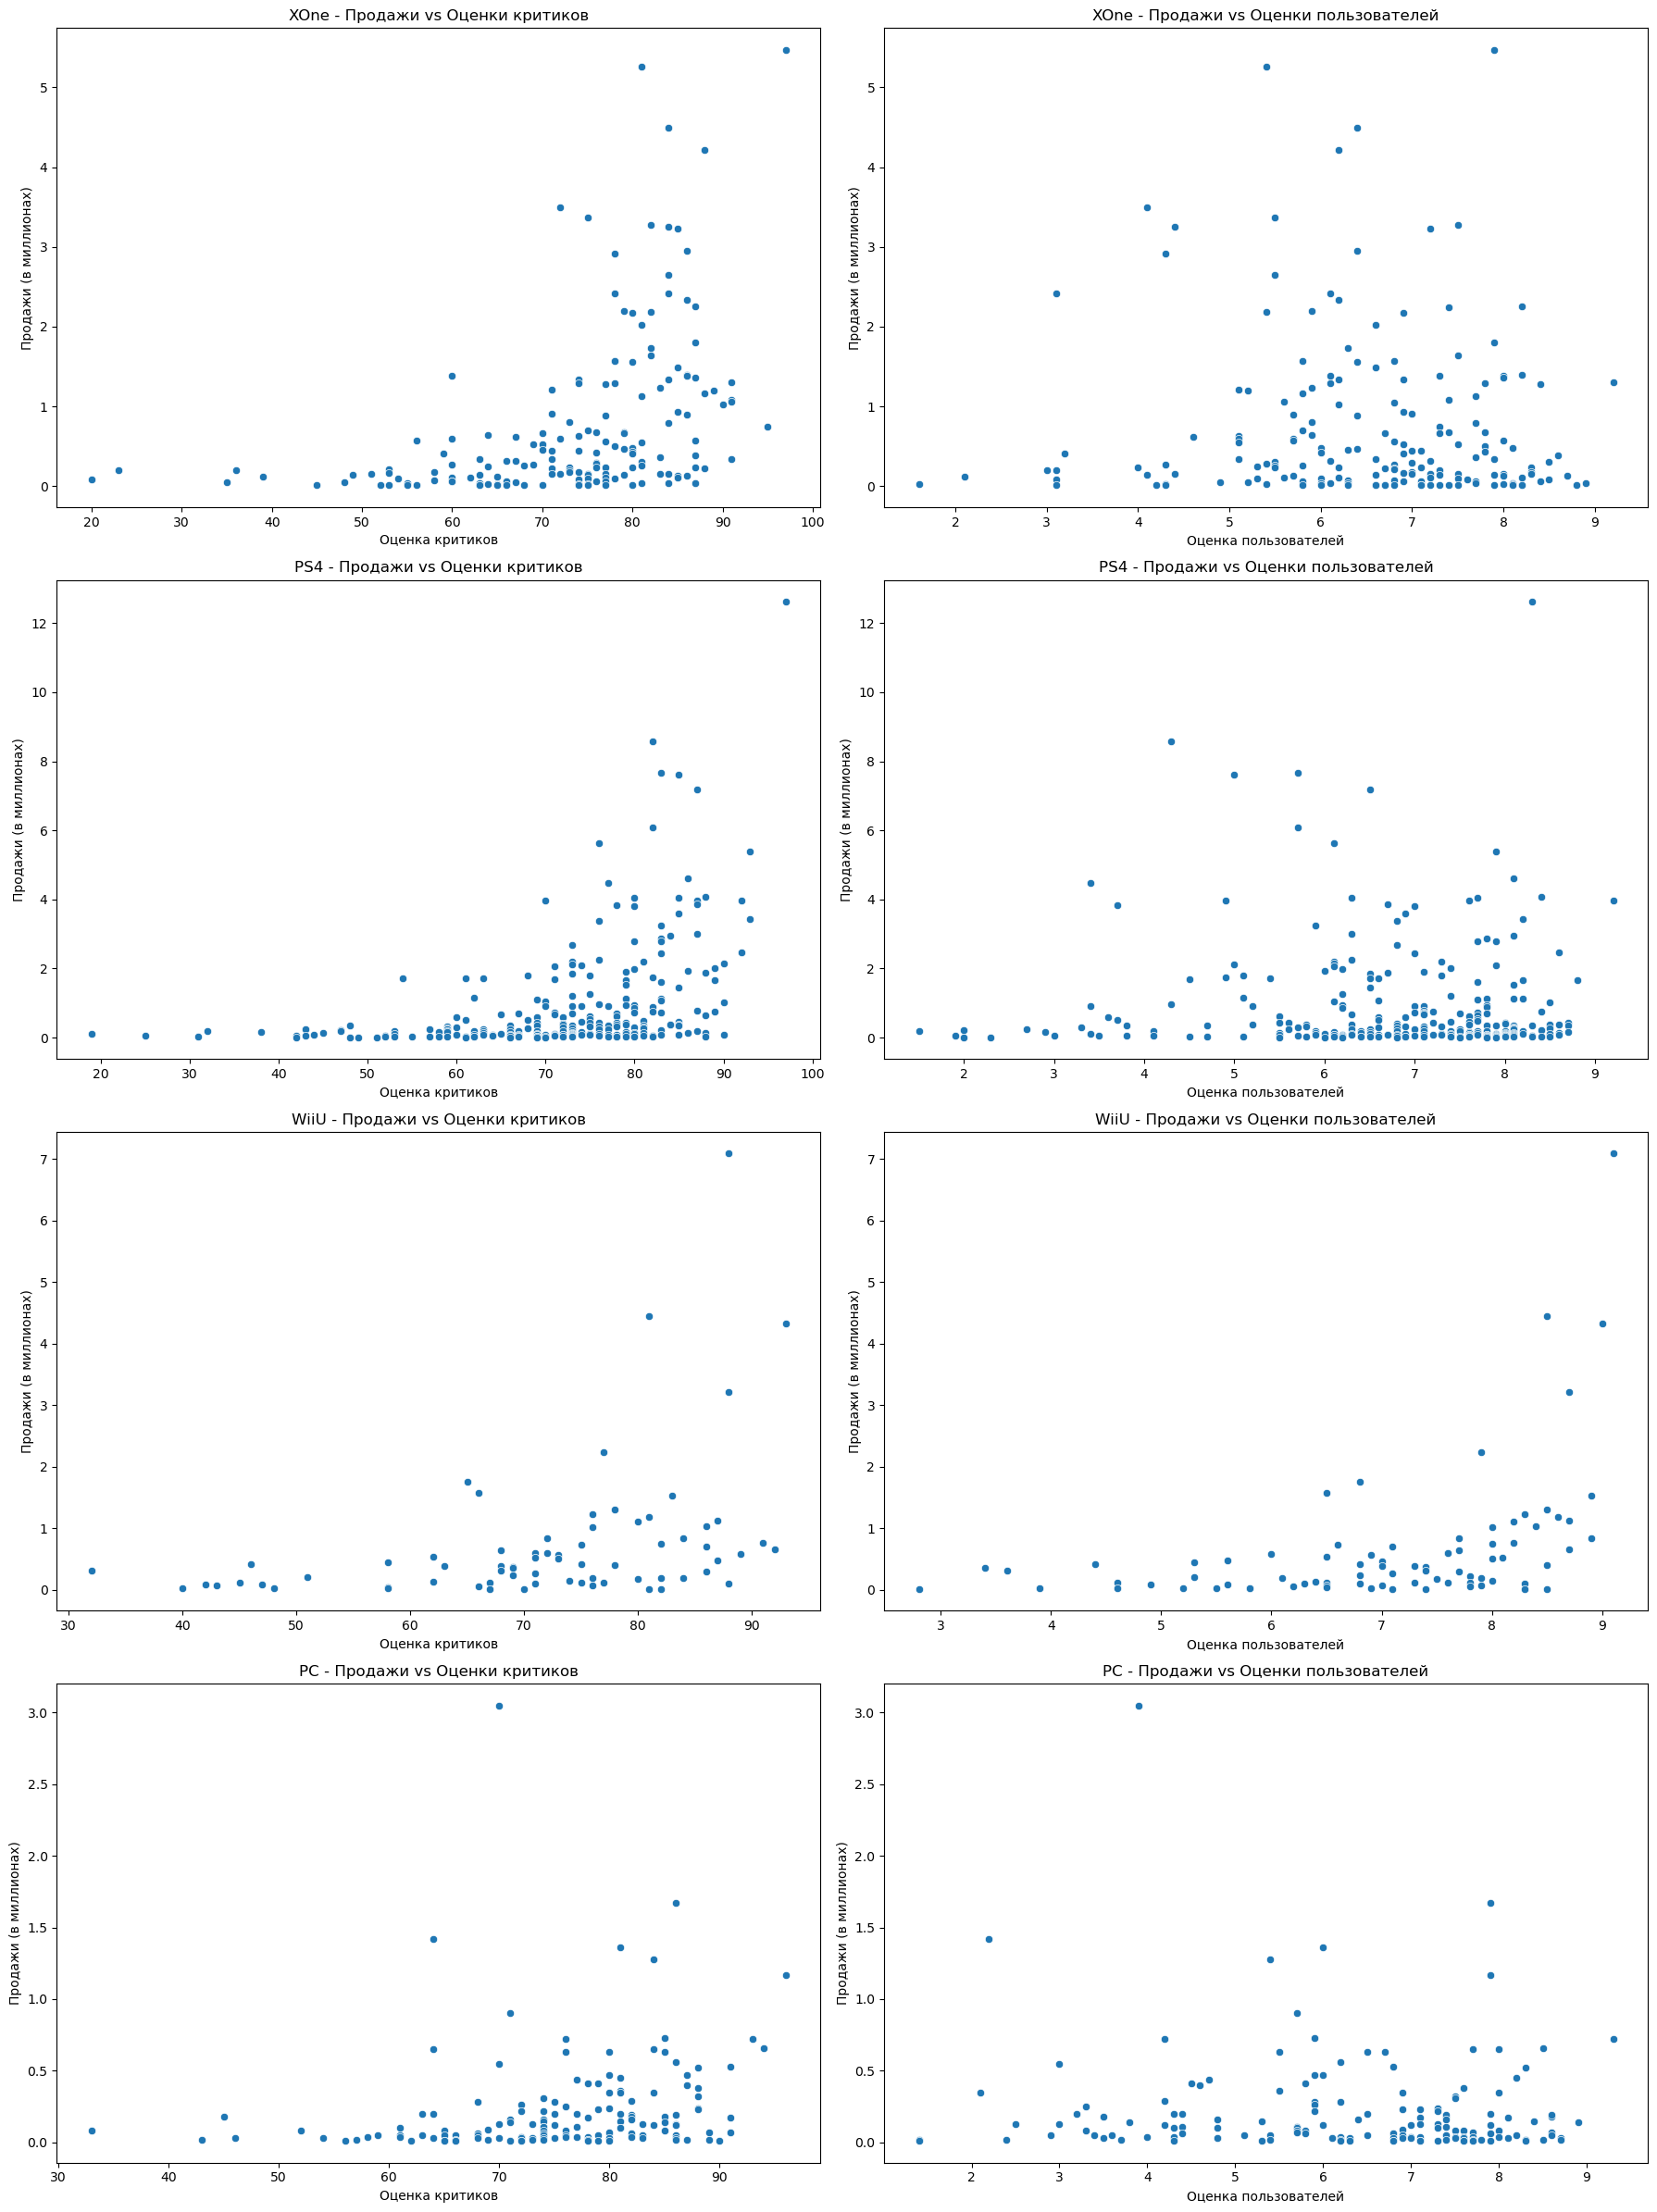

In [63]:
# Фильтруем данные по растущим и потенциально прибыльным платформам XOne, PS4, WiiU и PC
top_new_platforms = ['XOne', 'PS4', 'WiiU', 'PC']
filtered_new_games = new_games[new_games['platform'].isin(top_new_platforms)]

# Построим диаграммы рассеяния и посчитаем корреляцию для каждой платформы
plt.figure(figsize=(18, 24))

for i, platform in enumerate(top_new_platforms):
    platform_data = filtered_new_games[filtered_new_games['platform'] == platform]
    
    plt.subplot(4, 2, 2*i+1)
    sns.scatterplot(data=platform_data, x='critic_score', y='total_sales')
    plt.title(f'{platform} - Продажи vs Оценки критиков')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи (в миллионах)')
    
    plt.subplot(4, 2, 2*i+2)
    sns.scatterplot(data=platform_data, x='user_score', y='total_sales')
    plt.title(f'{platform} - Продажи vs Оценки пользователей')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи (в миллионах)')

    # Расчет корреляций
    correlation_critic = platform_data['critic_score'].corr(platform_data['total_sales'])
    correlation_user = platform_data['user_score'].corr(platform_data['total_sales'])
    
    print(f'\n{platform} - Корреляция между оценками критиков и продажами: {correlation_critic:.2f}')
    print(f'{platform} - Корреляция между оценками пользователей и продажами: {correlation_user:.2f}')

plt.tight_layout()
plt.show()

**Вывод:**

1. Оценки критиков: во всех платформах (корреляция XOne: 0.42, PS4: 0.41, WiiU: 0.38), за исключением PC (корреляция 0.20), есть умеренная положительная связь между оценками критиков и продажами. Игры с высокими оценками критиков, как правило, имеют более высокие продажи.

2. Оценки пользователей: во всех платформах (корреляция XOne: -0.07, PS4: -0.03, PC: -0.09), за исключением WiiU (корреляция 0.42), не оказывают влияние на продажи. У WiiU положительные отзывы пользователей могут иметь более заметное влияние на объем продаж.

**3.6. Посмотрим на общее распределение игр по жанрам.**

,genre,total_sales_sum,total_sales_median,games_count,games_percent
0,Action,321.87,0.110,766,34.303627
8,Shooter,232.98,0.450,187,8.374384
10,Sports,150.65,0.240,214,9.583520
7,Role-Playing,145.89,0.125,292,13.076579
3,Misc,62.82,0.100,155,6.941335
4,Platform,42.63,0.225,74,3.313927
6,Racing,39.89,0.120,85,3.806538
2,Fighting,35.31,0.125,80,3.582624
1,Adventure,23.64,0.030,245,10.971787
9,Simulation,21.76,0.100,62,2.776534


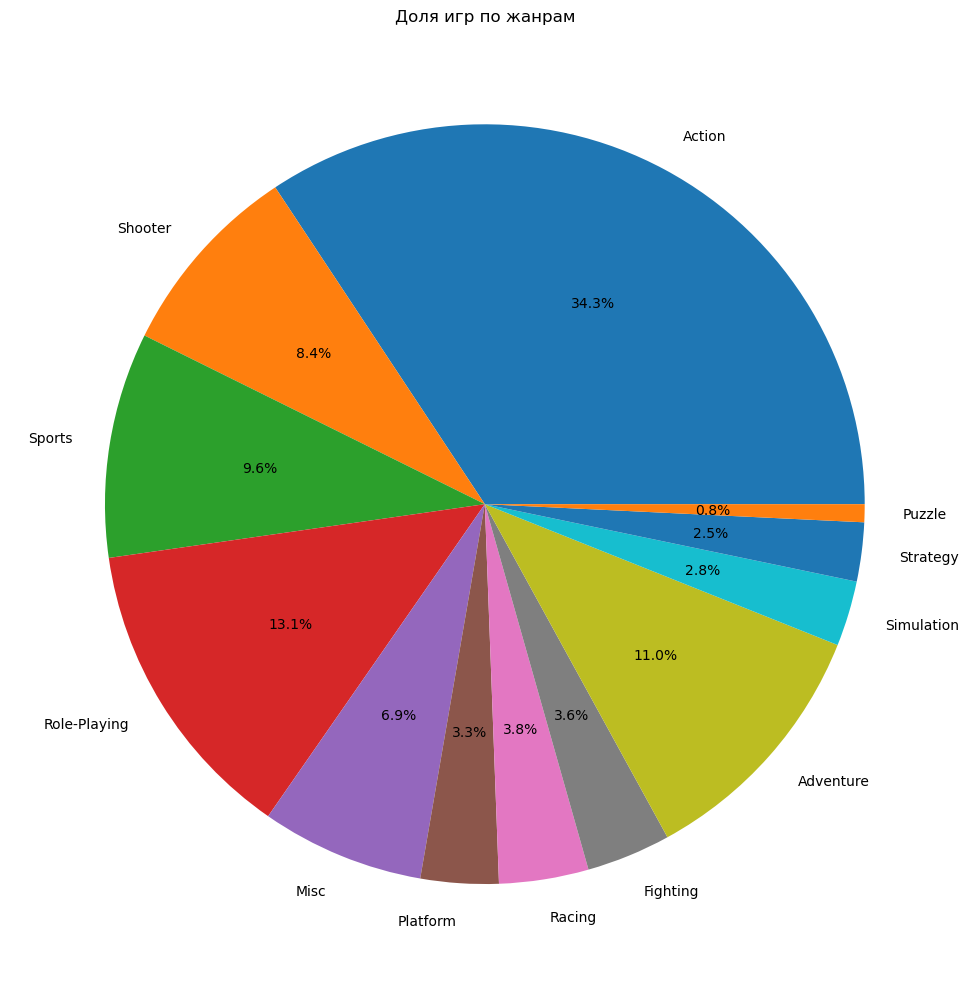

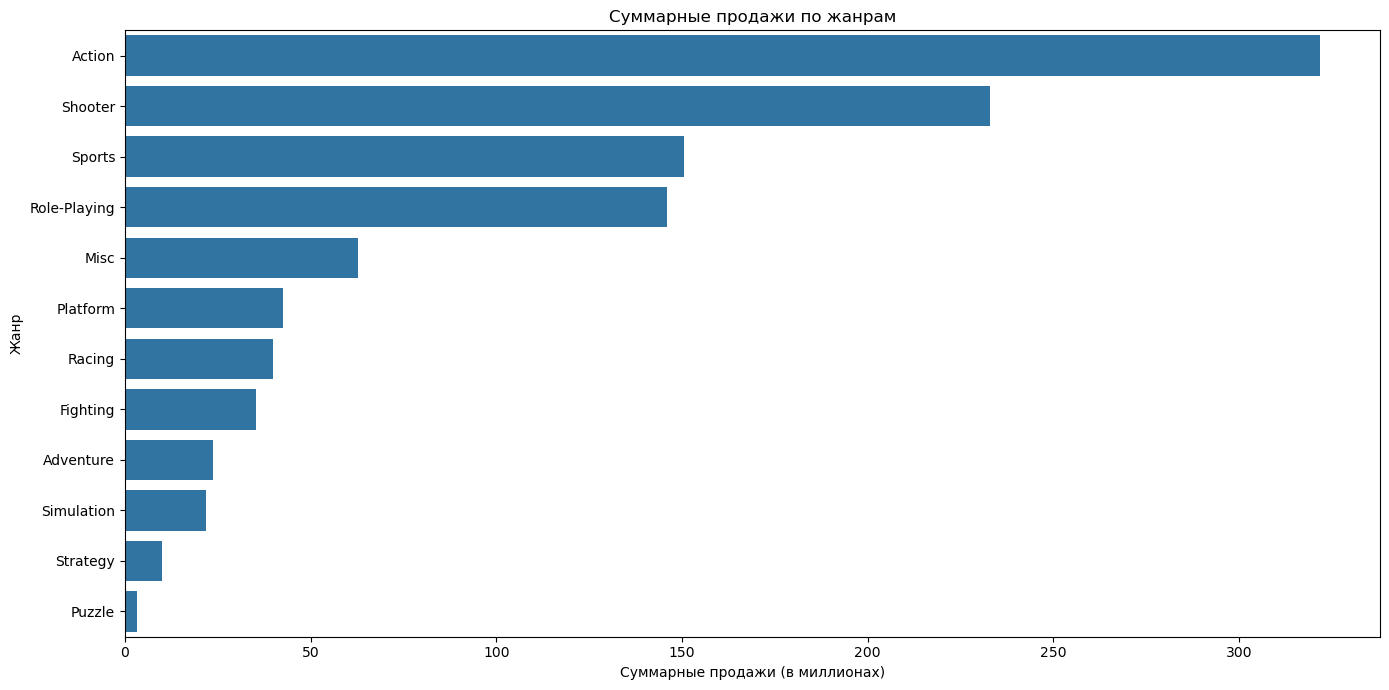

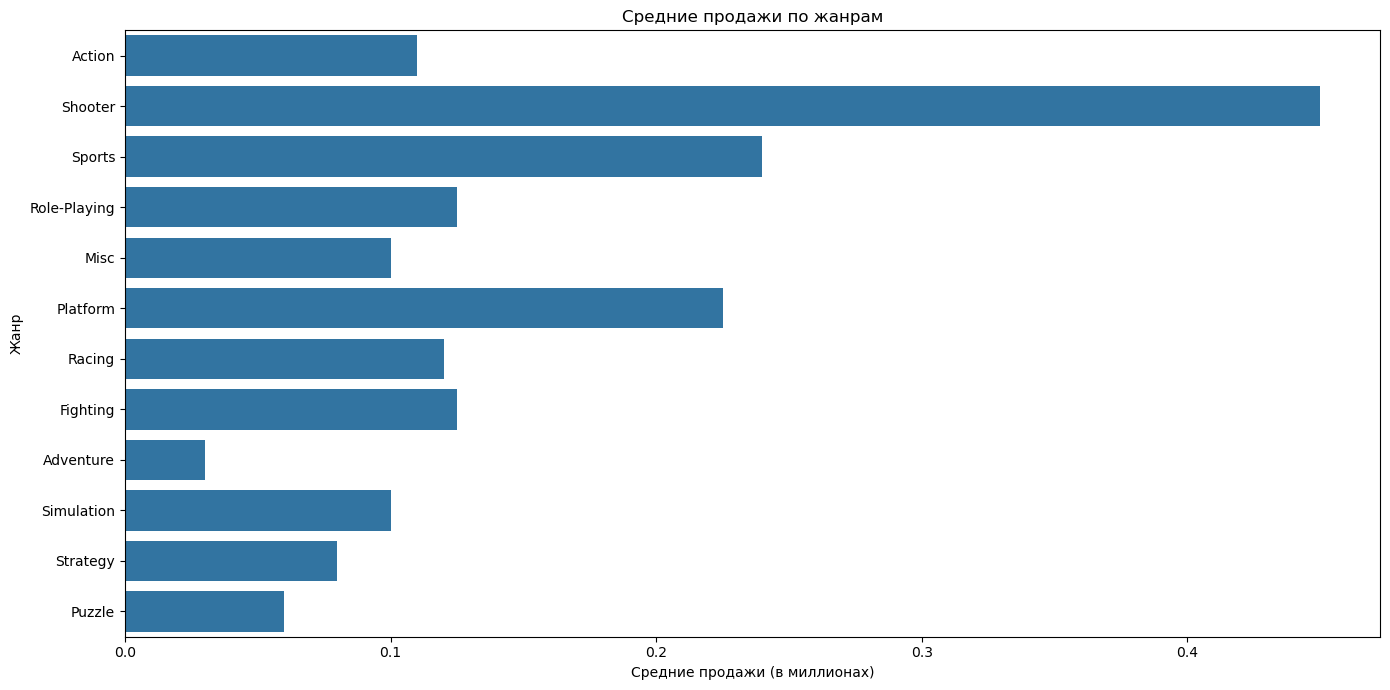

In [66]:
# Считаем суммарные и средние продажи
genre_sales = new_games.groupby('genre')['total_sales'].agg(['sum', 'median', 'count']).reset_index()
genre_sales.columns = ['genre', 'total_sales_sum', 'total_sales_median', 'games_count']

# Считаем доли игр для каждого жанра
total_games = genre_sales['games_count'].sum()
genre_sales['games_percent'] = (genre_sales['games_count'] / total_games) * 100

genre_sales = genre_sales.sort_values(by='total_sales_sum', ascending=False)
display(genre_sales)

# Построим круговую диаграмму доли игр по жанрам
plt.figure(figsize=(10, 10))
plt.pie(genre_sales['games_percent'], labels=genre_sales['genre'], autopct='%1.1f%%')
plt.title('Доля игр по жанрам')
plt.tight_layout()
plt.show()

# Построим график распределения продаж по жанрам
plt.figure(figsize=(14, 7))
sns.barplot(x='total_sales_sum', y='genre', data=genre_sales)
plt.title('Суммарные продажи по жанрам')
plt.xlabel('Суммарные продажи (в миллионах)')
plt.ylabel('Жанр')
plt.tight_layout()
plt.show()

# Построим график среднего уровня продаж по жанрам
plt.figure(figsize=(14, 7))
sns.barplot(x='total_sales_median', y='genre', data=genre_sales)
plt.title('Средние продажи по жанрам')
plt.xlabel('Средние продажи (в миллионах)')
plt.ylabel('Жанр')
plt.tight_layout()
plt.show()

**Вывод:**
1. Доля игр по жанрам: всего актуальных игр: 2233. Action составляет более трети всех игр (34.30%). Role-Playing (13.07%) и Adventure (10.97%) входят в тройку. 

2. Прибыльные жанры:
- Action: имеет наибольшие суммарные продажи (321.87 млн) и составляет 34.30% всех игр. Однако медиана продаж относительно низкая (0.110 млн), что может указывать на большое количество игр с низкими продажами, но с несколькими очень успешными играми.
- Shooter: второй по прибыльности жанр с суммарными продажами 232.98 млн и  с самой высокой медианой продаж (0.450 млн), что говорит о том, что даже менее популярные игры в этом жанре продаются лучше, чем в других жанрах.
- Sports: третий по прибыльности жанр с суммарными продажами 150.65 млн и медианой 0.240 млн, что делает этот жанр привлекательным. Он составляет 9.58% всех игр.

## Портрет пользователя каждого региона (NA, EU, JP)

Составим портрет пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5). 
- самые популярные жанры (топ-5).
- влияет ли рейтинг ESRB на продажи в отдельном регионе.

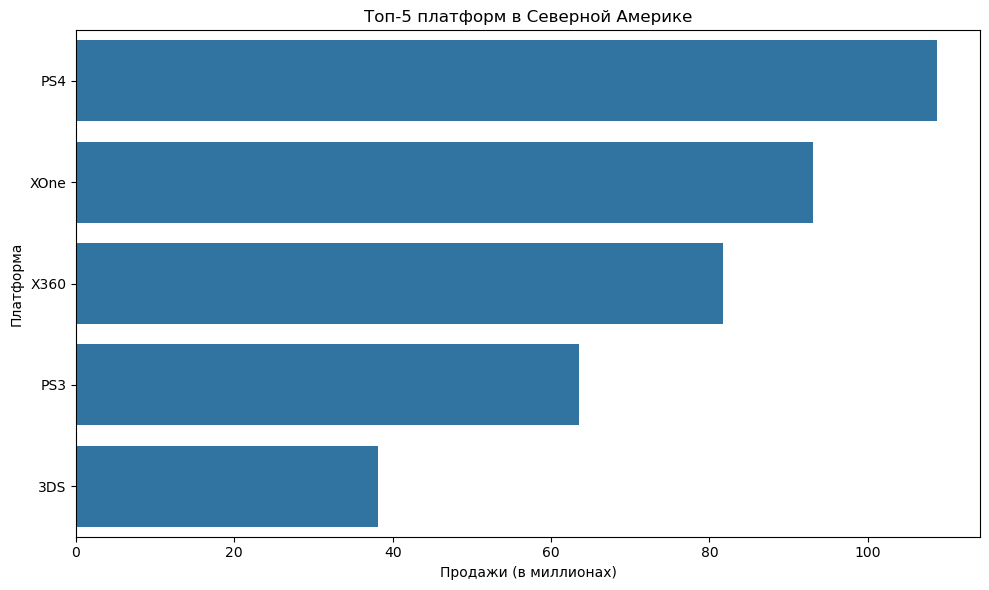

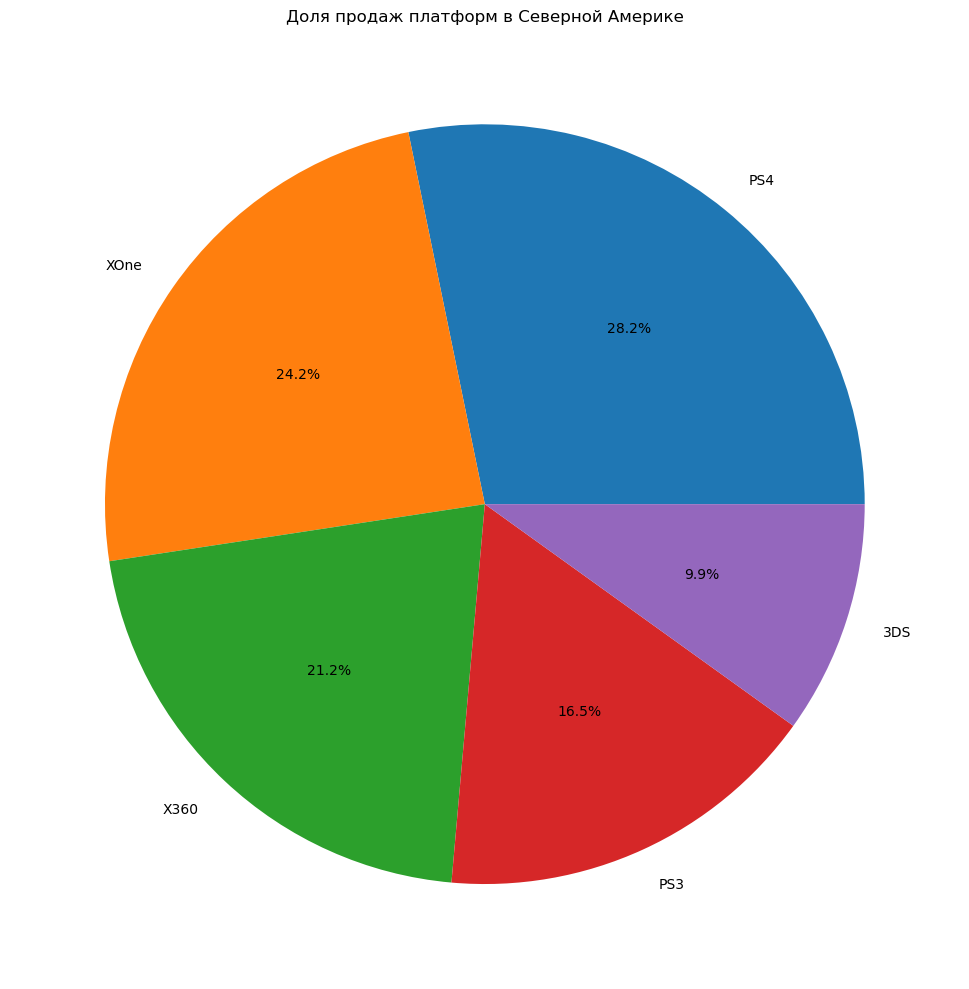

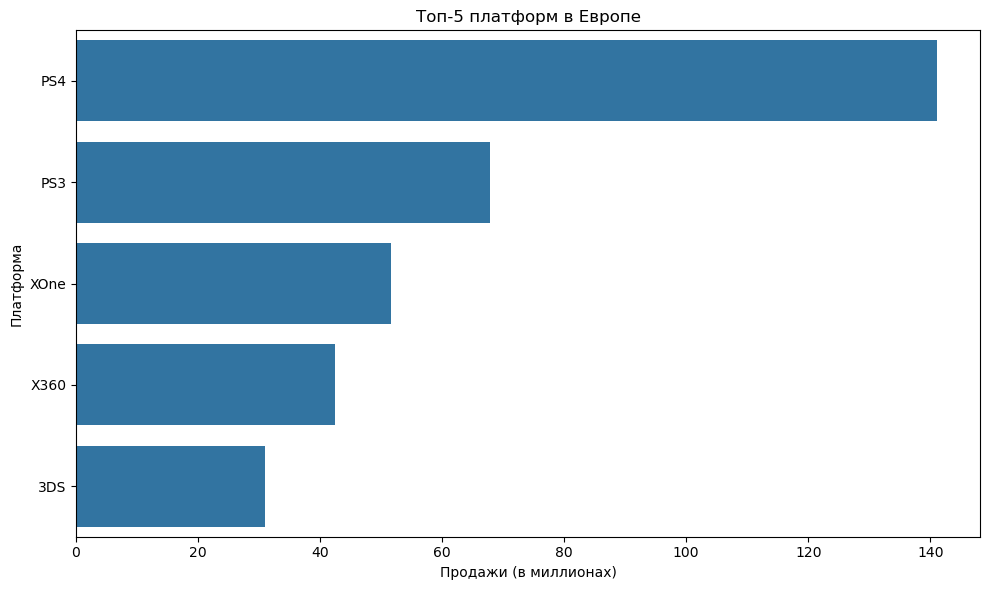

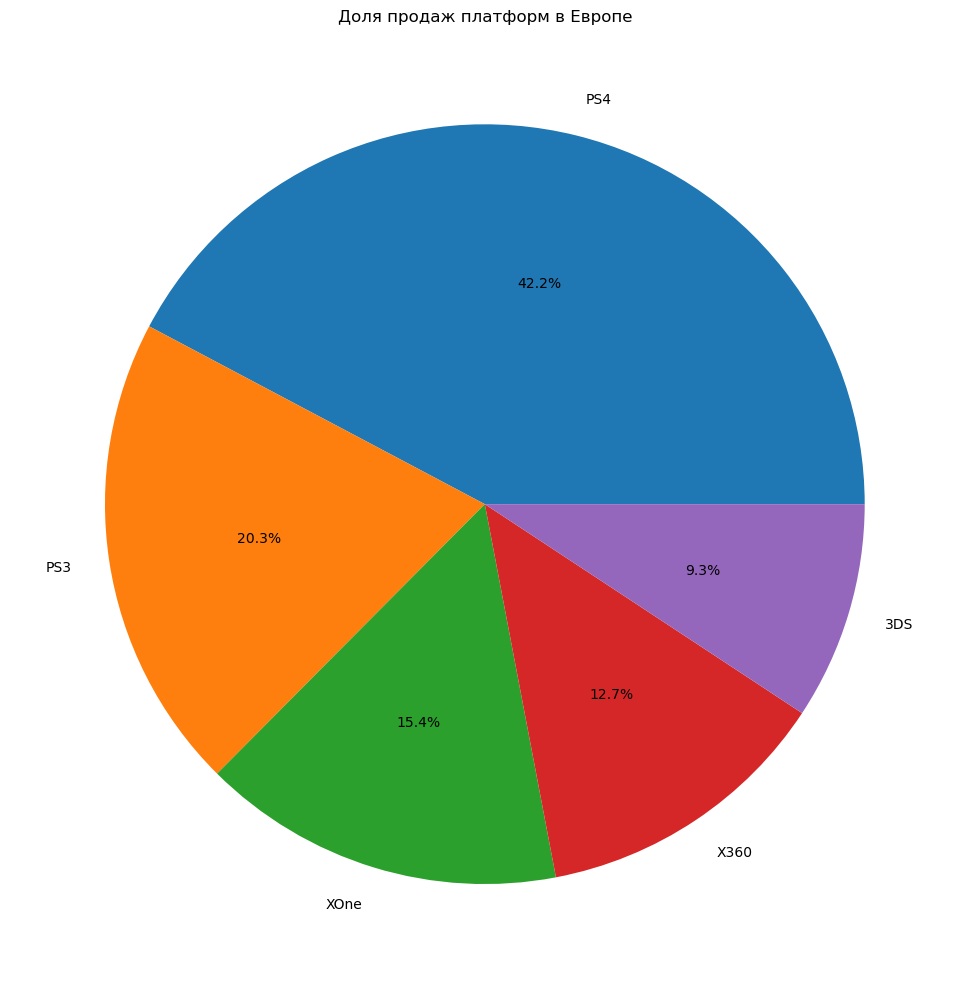

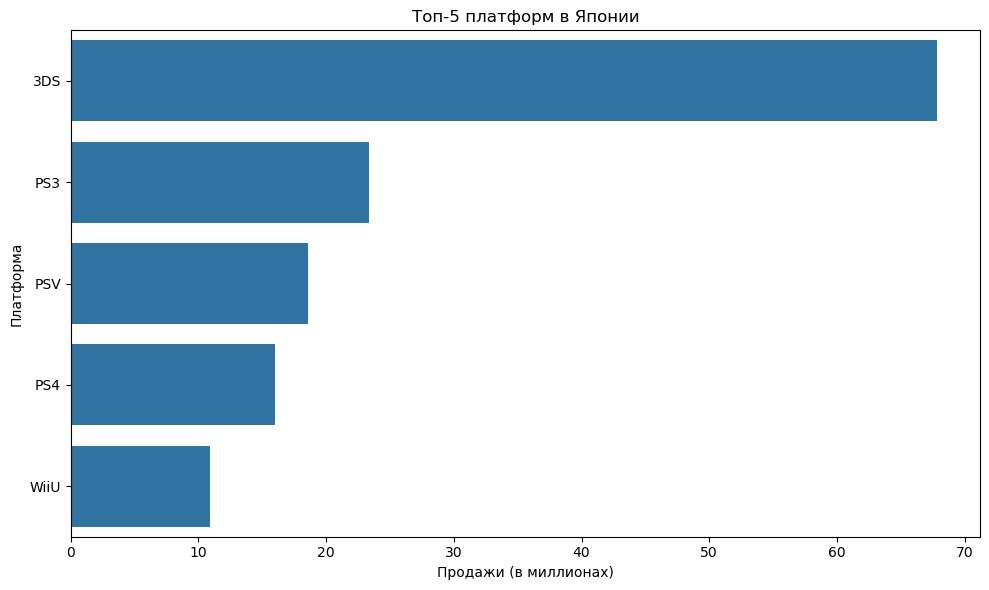

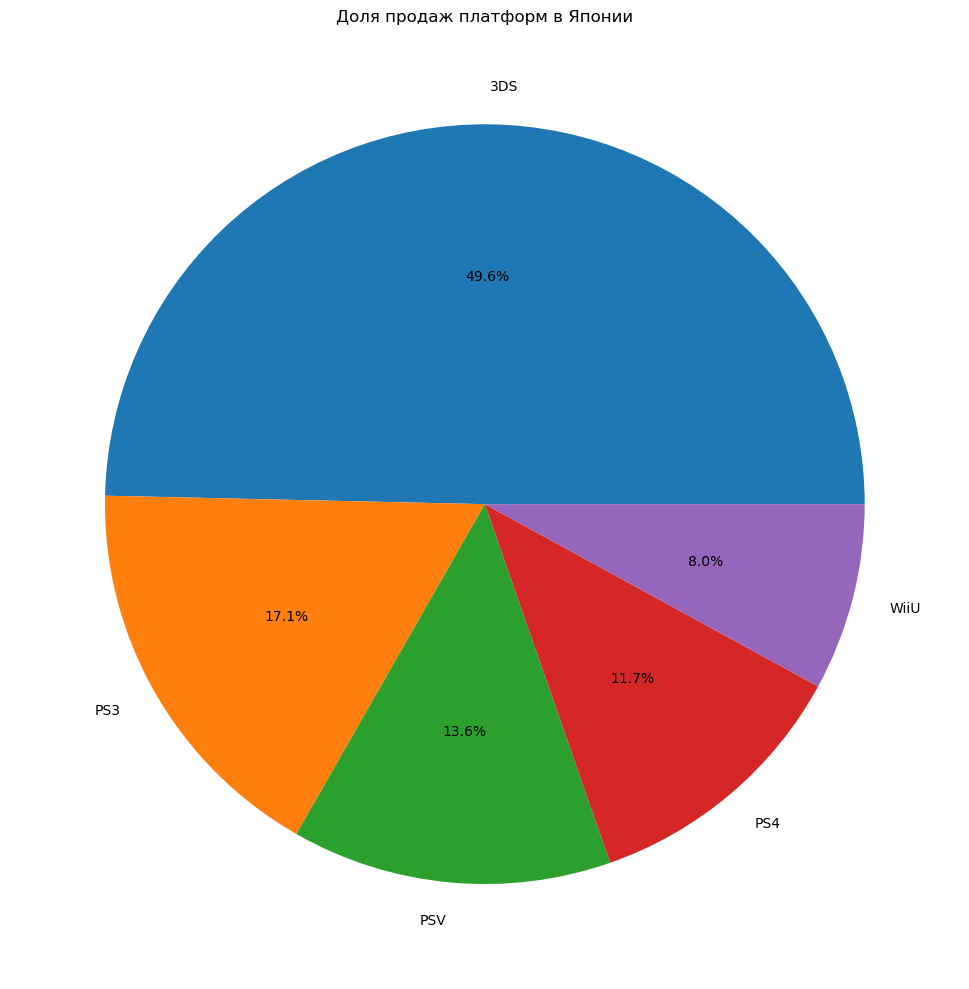

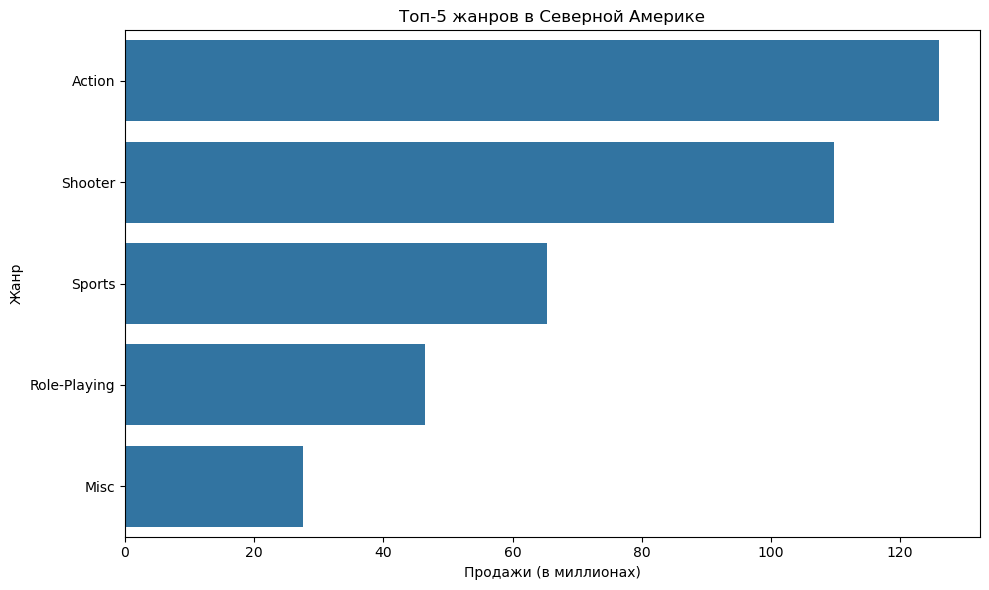

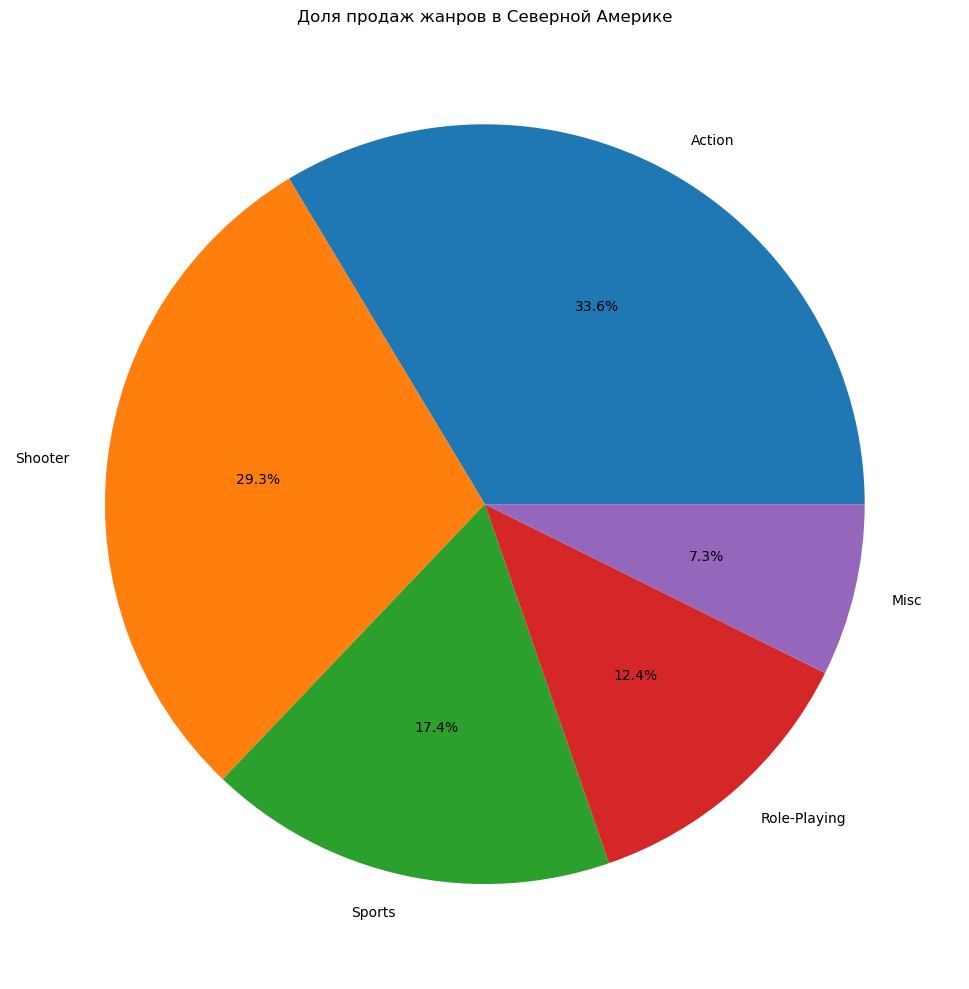

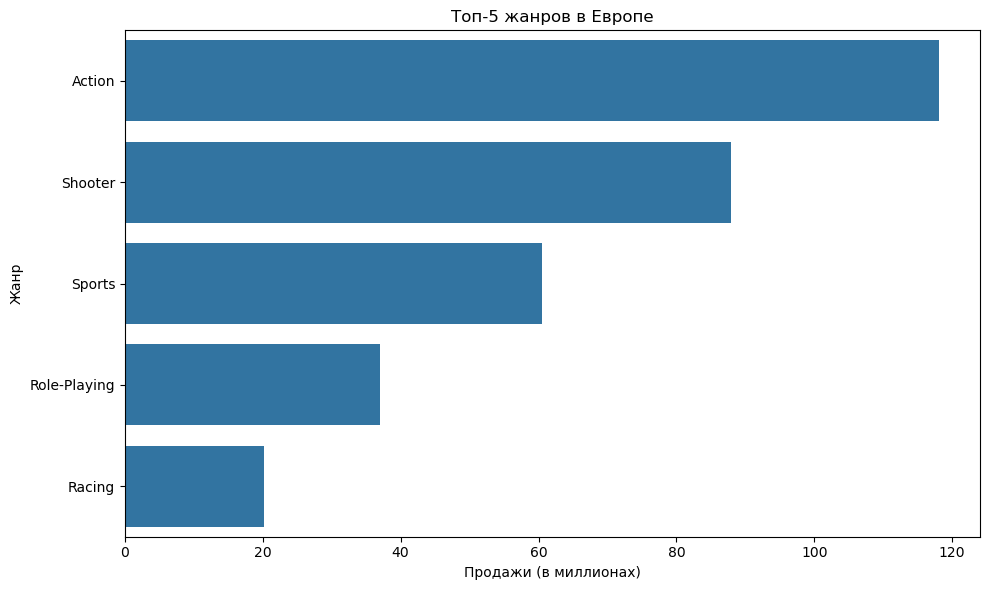

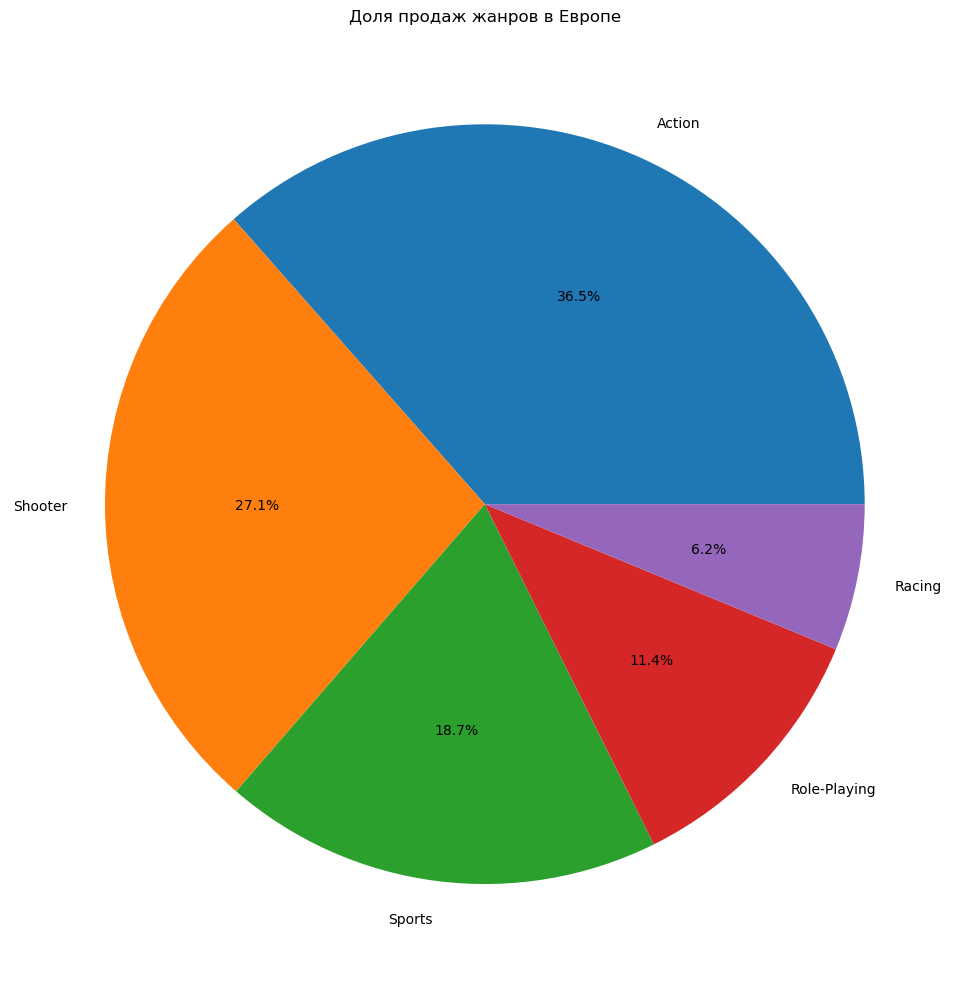

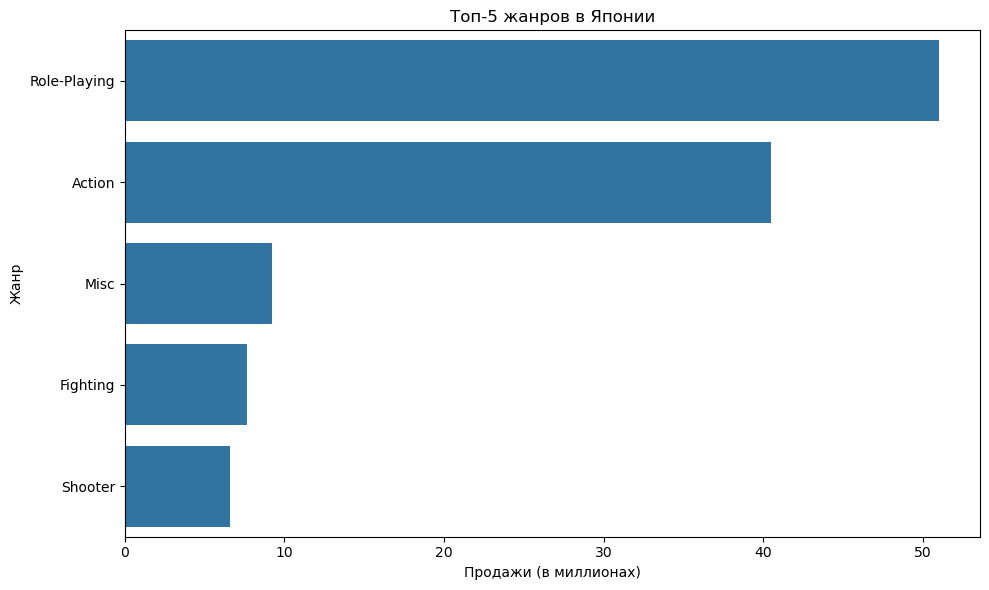

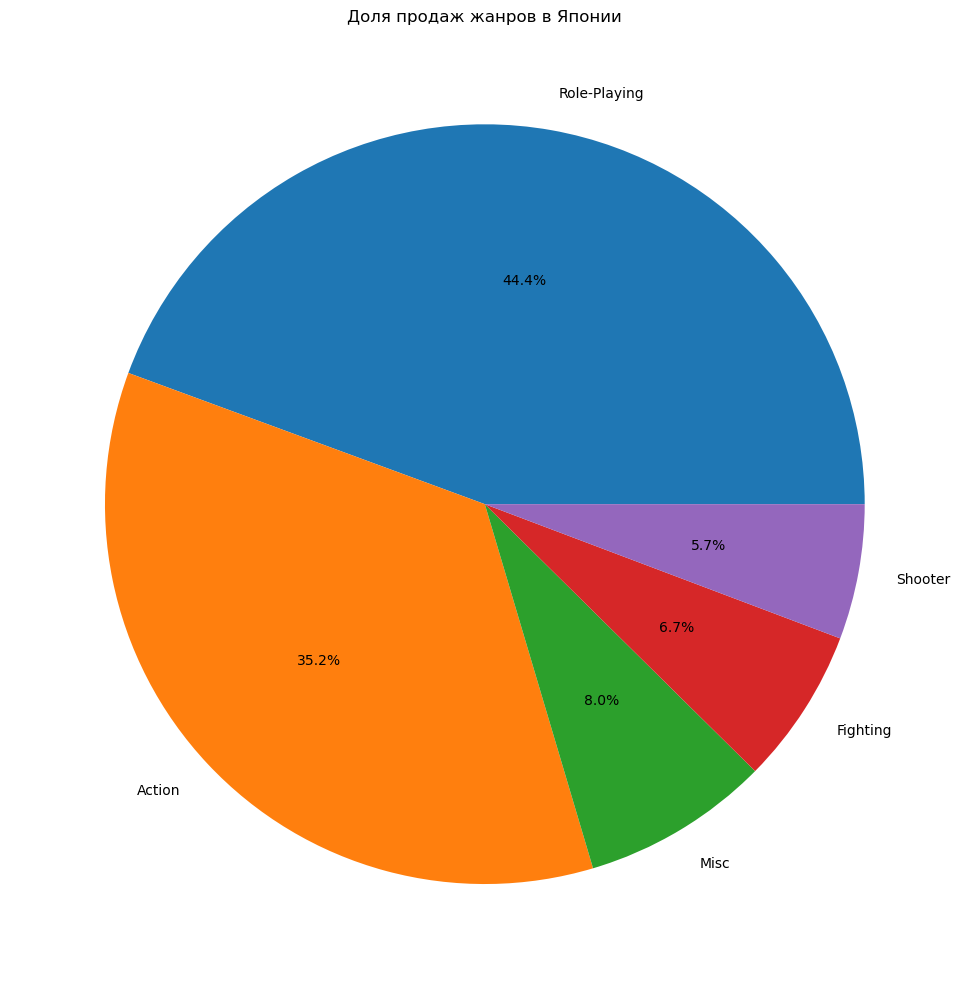

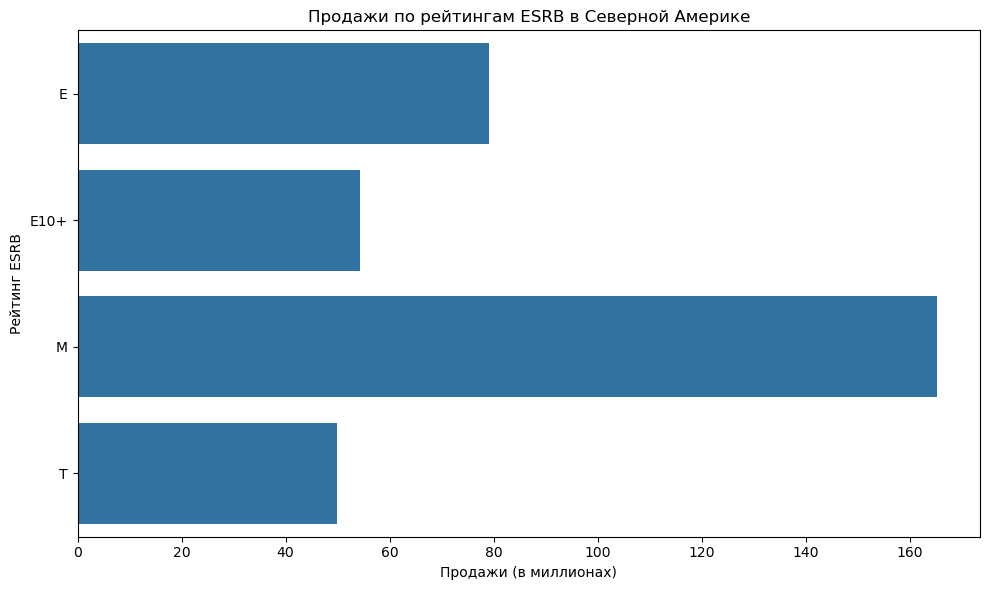

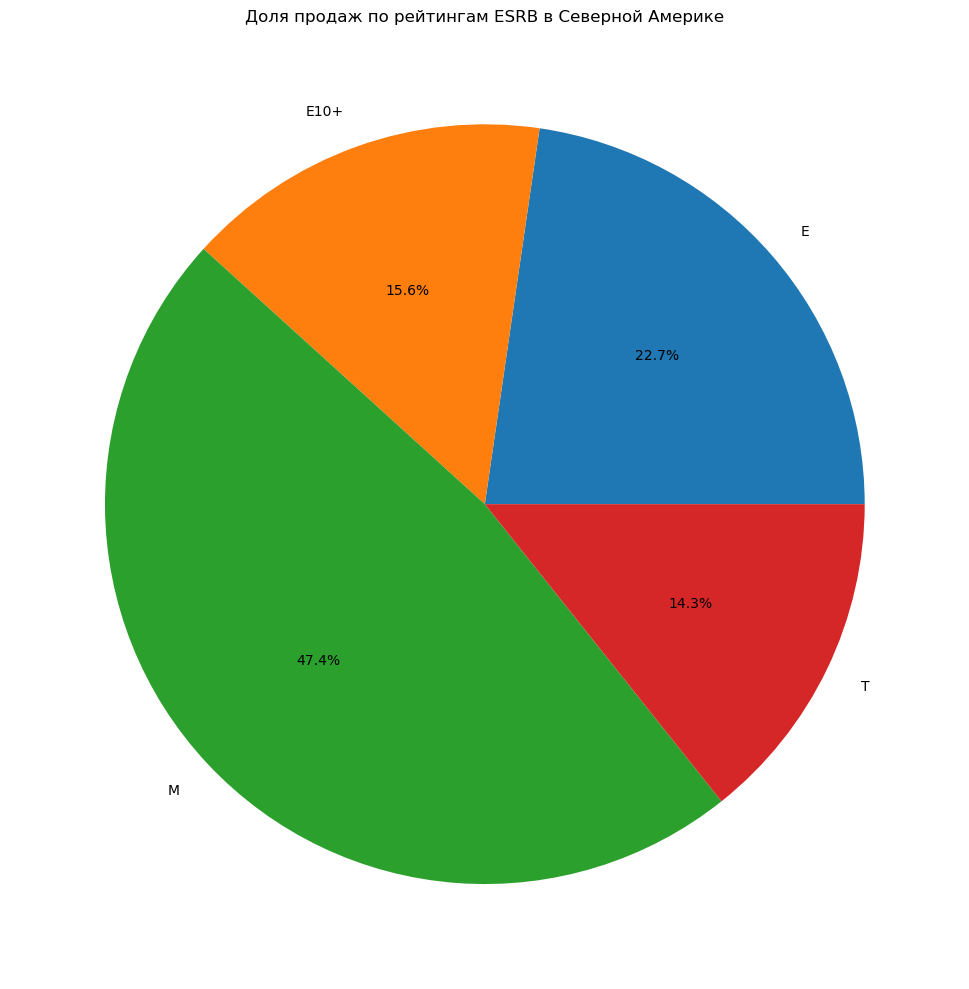

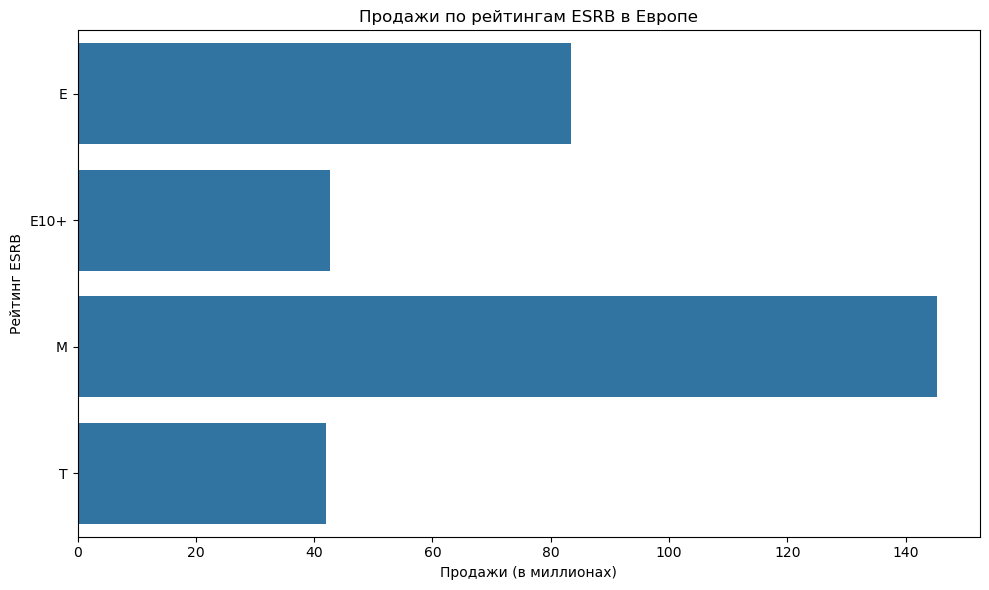

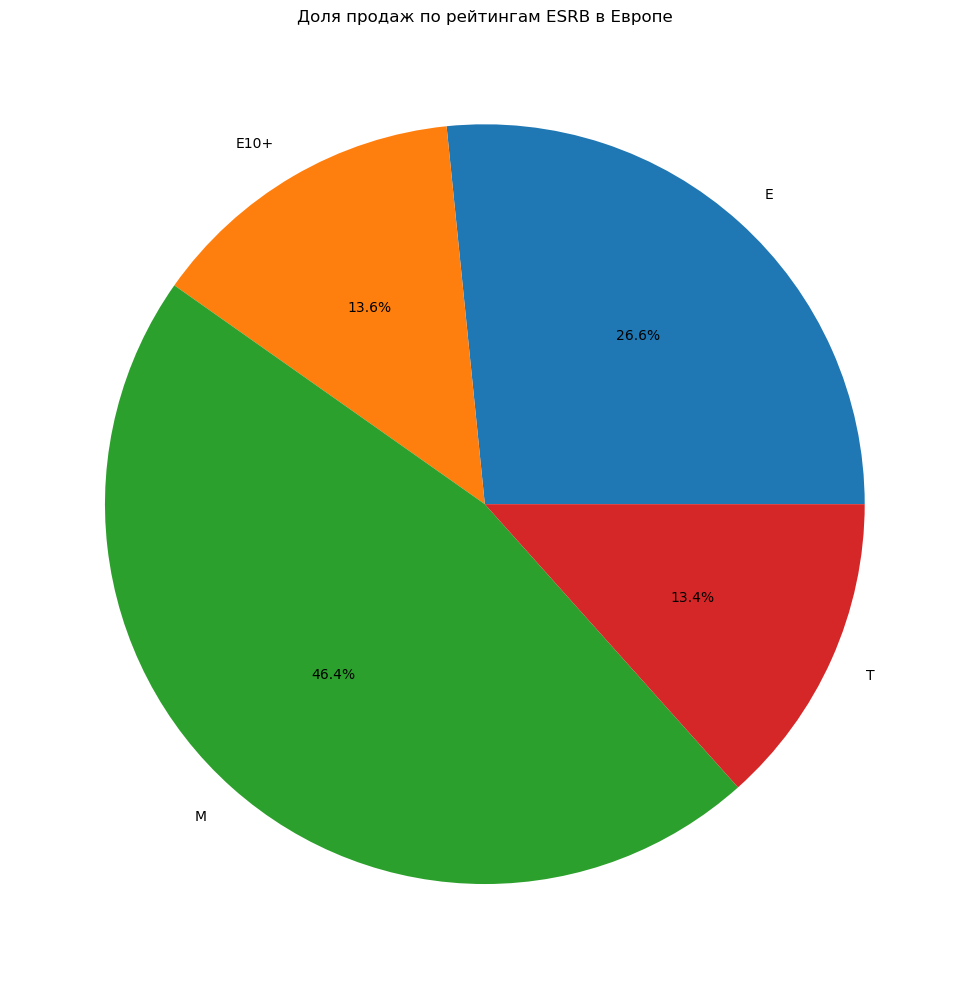

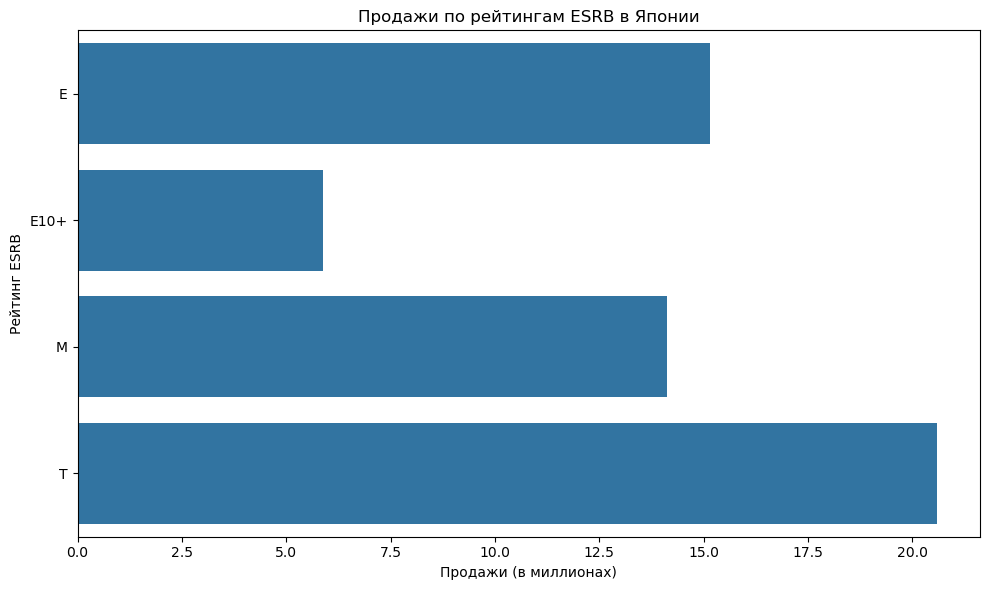

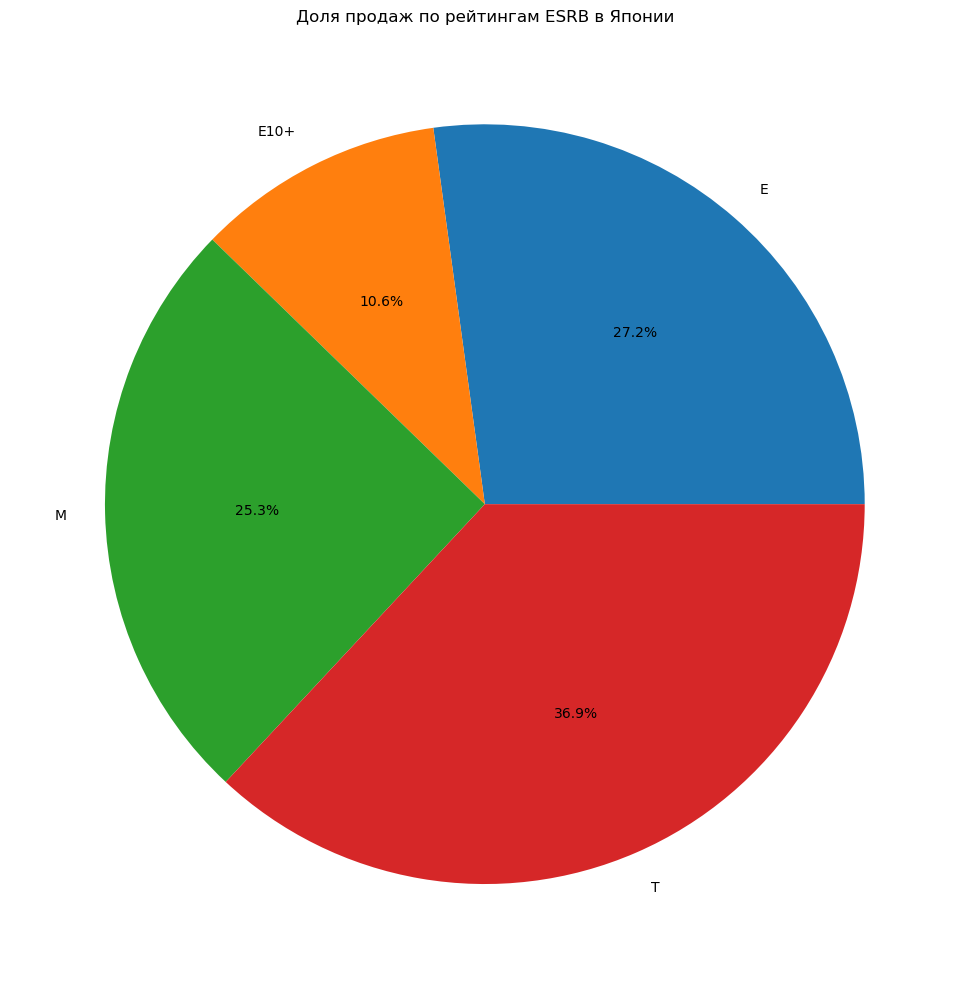

In [70]:
# Группируем данные по регионам и платформам
platform_sales_na = new_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_eu = new_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_jp = new_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Группируем данные по регионам и жанрам
genre_sales_na = new_games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
genre_sales_eu = new_games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
genre_sales_jp = new_games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Анализируем влияние рейтинга ESRB на продажи
esrb_sales_na = new_games.groupby('rating')['na_sales'].sum()
esrb_sales_eu = new_games.groupby('rating')['eu_sales'].sum()
esrb_sales_jp = new_games.groupby('rating')['jp_sales'].sum()

# Функция для построения графиков
def plot_bar(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=data.values, y=data.index)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

# Функция для построения круговой диаграммы
def plot_pie(data, title):
    plt.figure(figsize=(10, 10))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', normalize=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Построим графики
plot_bar(platform_sales_na, 'Топ-5 платформ в Северной Америке', 'Продажи (в миллионах)', 'Платформа')
plot_pie(platform_sales_na / platform_sales_na.sum(), 'Доля продаж платформ в Северной Америке')

plot_bar(platform_sales_eu, 'Топ-5 платформ в Европе', 'Продажи (в миллионах)', 'Платформа')
plot_pie(platform_sales_eu / platform_sales_eu.sum(), 'Доля продаж платформ в Европе')

plot_bar(platform_sales_jp, 'Топ-5 платформ в Японии', 'Продажи (в миллионах)', 'Платформа')
plot_pie(platform_sales_jp / platform_sales_jp.sum(), 'Доля продаж платформ в Японии')

plot_bar(genre_sales_na, 'Топ-5 жанров в Северной Америке', 'Продажи (в миллионах)', 'Жанр')
plot_pie(genre_sales_na / genre_sales_na.sum(), 'Доля продаж жанров в Северной Америке')

plot_bar(genre_sales_eu, 'Топ-5 жанров в Европе', 'Продажи (в миллионах)', 'Жанр')
plot_pie(genre_sales_eu / genre_sales_eu.sum(), 'Доля продаж жанров в Европе')

plot_bar(genre_sales_jp, 'Топ-5 жанров в Японии', 'Продажи (в миллионах)', 'Жанр')
plot_pie(genre_sales_jp / genre_sales_jp.sum(), 'Доля продаж жанров в Японии')

plot_bar(esrb_sales_na, 'Продажи по рейтингам ESRB в Северной Америке', 'Продажи (в миллионах)', 'Рейтинг ESRB')
plot_pie(esrb_sales_na / esrb_sales_na.sum(), 'Доля продаж по рейтингам ESRB в Северной Америке')

plot_bar(esrb_sales_eu, 'Продажи по рейтингам ESRB в Европе', 'Продажи (в миллионах)', 'Рейтинг ESRB')
plot_pie(esrb_sales_eu / esrb_sales_eu.sum(), 'Доля продаж по рейтингам ESRB в Европе')

plot_bar(esrb_sales_jp, 'Продажи по рейтингам ESRB в Японии', 'Продажи (в миллионах)', 'Рейтинг ESRB')
plot_pie(esrb_sales_jp / esrb_sales_jp.sum(), 'Доля продаж по рейтингам ESRB в Японии')

**Вывод:**
1. Популярные платформы:
- Северная Америка и Европа: 1 место с большим отрывом - PS4, XOne, X360, PS3 - в тройке.
- Япония: 1 место с большим отрывом (почти 50%) - 3DS, за ней следуют PS3 и PSV. Японский рынок отличается более сильной позицией портативных консолей.

2. Популярные жанры:
- Северная Америка и Европа: лидирует Action, за ней следуют Shooter, Sports.
- Япония: Role-Playing и Action лидируют, доля остальных жанров незначительна.

3. Влияние рейтинга ESRB:
- Северная Америка и Европа: рейтинг M (Mature) имеет наибольшие продажи, что указывает на популярность игр для взрослых.
- Япония: рейтинг T (Teen) лидирует, с рейтингами E (Everyone) и M (Mature) на втором и третьем местах соответственно.

## Проверим гипотезы

**Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**
- Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.
- Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различны.

Для проверки этой гипотезы применим двухсторонний t-тест для независимых выборок, так как мы сравниваем средние значения двух независимых групп.

In [75]:
# Фильтруем данные для Xbox One и PC
xone_ratings = new_games[(new_games['platform'] == 'XOne') & (new_games['user_score'].notnull())]['user_score']
pc_ratings = new_games[(new_games['platform'] == 'PC') & (new_games['user_score'].notnull())]['user_score']

alpha = 0.05

results = st.ttest_ind(xone_ratings, pc_ratings)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC различны.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.


Для визуализации данных и результатов проверки гипотез, мы построим графики распределения пользовательских рейтингов для платформ Xbox One и PC.

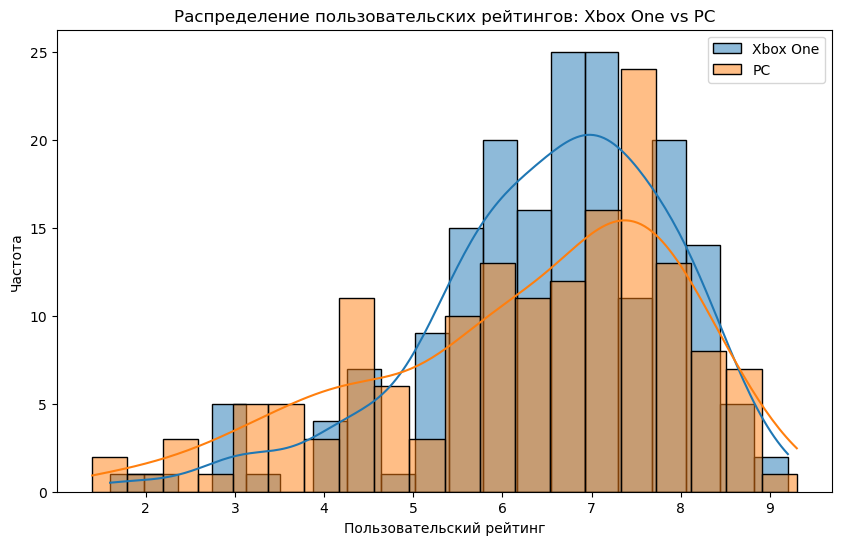

In [77]:
# Гистограммы распределения пользовательских рейтингов для платформ
plt.figure(figsize=(10, 6))
sns.histplot(xone_ratings, kde=True, label='Xbox One', bins=20)
sns.histplot(pc_ratings, kde=True, label='PC', bins=20)
plt.title('Распределение пользовательских рейтингов: Xbox One vs PC')
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Частота')
plt.legend()

**Гипотеза №2: Средние пользовательские рейтинги жанров Action и Sports разные.**
- Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковы.
- Альтернативная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различны.

Для проверки этой гипотезы также применим двухсторонний t-тест для независимых выборок, так как мы сравниваем средние значения двух независимых групп.

In [80]:
# Фильтруем данные для Action и Sports
action_ratings = new_games[(new_games['genre'] == 'Action') & (new_games['user_score'].notnull())]['user_score']
sports_ratings = new_games[(new_games['genre'] == 'Sports') & (new_games['user_score'].notnull())]['user_score']

alpha = 0.05

results = st.ttest_ind(action_ratings, sports_ratings)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports различны.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковы.')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports различны.


Для визуализации данных и результатов проверки гипотез, мы построим графики распределения пользовательских рейтингов для жанров Action и Sports.

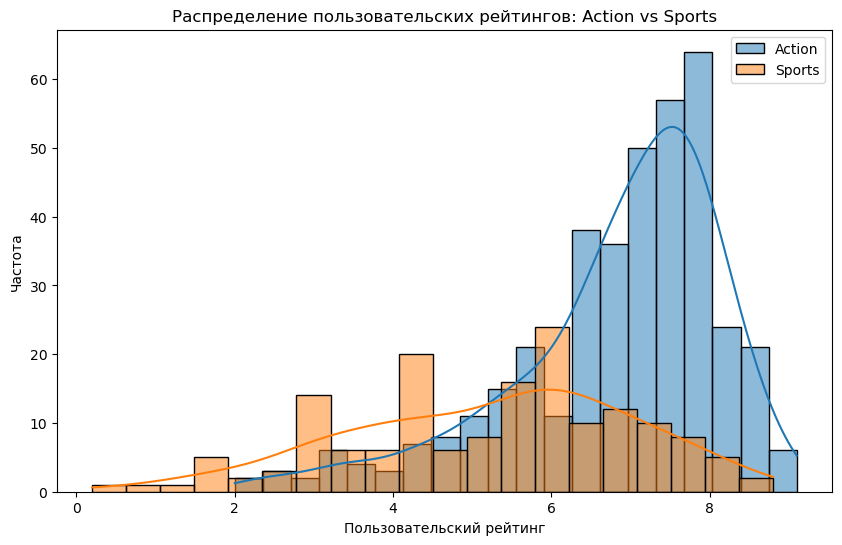

In [82]:
# Гистограммы распределения пользовательских рейтингов для жанров
plt.figure(figsize=(10, 6))
sns.histplot(action_ratings, kde=True, label='Action', bins=20)
sns.histplot(sports_ratings, kde=True, label='Sports', bins=20)
plt.title('Распределение пользовательских рейтингов: Action vs Sports')
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Частота')
plt.legend()

**Вывод:**
1. Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Подтвердилась.
- распределения рейтингов для Xbox One и PC довольно похожи.
- средние значения пользовательских рейтингов не показали статистически значимых различий.

2. Гипотеза №2: Средние пользовательские рейтинги жанров Action и Sports разные. Подтвердилась.
- распределения рейтингов для жанров Action и Sports показали значительные различия.
- средние значения пользовательских рейтингов для этих жанров оказались статистически различными.

## Выводы

**1. Общая информация.**
Таблица *games* содержит *16715 строк, 11 столбцов*. Столбцы содержат как числовые, так и строковые данные.

**2. Предобработка данных.**
1. *Приведение типов данных:* преобразовали типы данных в столбцах year_of_release и user_score для корректного анализа:
- year_of_release: float64 -> datetime (int64)
- user_score: object -> float.


2. *Дубликаты:* была обнаружена и удалена 1 строка-дубликат по столбцам name, platform, year_of_release.


3. *Пропущенные значения:* 
- обнаруженные пропуски: обнаружены пропуски в 6 столбцах и примерно в 50% строк.
- удаленные строки: удалены 271 строка из 16715, что составляет 1.6%. Были удалены пропуски в столбцах genre, name и year_of_release. Количество пропущенных значений в этих столбцах не критично, а их замена могла бы привести к искажению данных.
- оставленные пропуски: пропуски в столбцах critic_score, user_score и rating были оставлены, поскольку это усредненные значения выборки, а не набор случайных наблюдений. Заполнение пропусков усредненными показателями может привести к искажению данных. Кроме того, пропуски сами по себе могут быть значимыми и указывать, например, на низкий интерес к игре или другие специфические причины.


4. *Аномальные значения:* нет.


5. *Новые столбцы:* добавлен 1 новый столбец total_sales с суммарными продажи во всех регионах.

После предобработки данных осталось 16443 строки и 12 столбцов, всего было удалено 272 из 16715 строк (1.6%).

**3. Исследовательский анализ данных.**

1. Количество игр, выпускаемых в разные годы
- 1980-1990 гг.: в этот период выходило относительно небольшое количество игр.
- с 1991 года: наблюдается постепенное увеличение числа выпусков игр.
- 2000-е гг.: пик выпуска игр наблюдается в 2008 и 2009 годах, когда количество выпускаемых игр достигает примерно 1400 в год. Это время характеризуется бурным развитием индустрии.
- 2010-2011 гг.: наблюдается снижение количества выпускаемых игр, что может быть связано с ростом популярности мобильных и гипер-казуальных игр.

2. Продажи по платформам
- Популярные платформы: PS2, X360, PS3 и Wii имеют высокие показатели продаж.
- Долговечность платформ: PC и DS имеют наиболее долгий жизненный цикл.
- Устаревание платформ: с выходом новых версий платформы старого поколения теряют популярность. Например, PS -> PS2 -> PS3 -> PS4 и XB -> X360 -> XOne.

3. Прогноз на 2017 год

Цель проекта — найти закономерности, определяющие успешность игр, поэтому для анализа будем использовать данные за актуальный период. В нашем случае актуальный период начинается с 2013 года: семейства Playstation, XBox, Wii выпустили новые поколения платформ.

- Растущие платформы: платформы нового поколения, такие как PS4 и XOne, показывают рост и являются потенциально прибыльными. У платформ старого поколения, такие как PS3, X360 и 3DS продажи потихоньку снижаются.
- PC: несмотря на снижение продаж, ПК остается важной и стабильной платформой с долгосрочной перспективой.

4. Диаграмма размаха по глобальным продажам игр

Растущие и потенциально прибыльные платформы: платформы нового поколения XOne, PS4, WiiU и PC, который стабилен на протяжении всего времени и стоит особняком. Эти платформы имеют высокие средние и максимальные продажи, что делает их привлекательными для выпуска новых игр. 


5. Влияние оценок на продажи XOne, PS4, WiiU, PC
- Оценки критиков: на платформах XOne, PS4, WiiU наблюдается умеренная положительная связь между оценками критиков и продажами. Высокие оценки критиков способствуют увеличению продаж, за исключением платформы PC, где корреляция слабее.
- Оценки пользователей: на платформах XOne, PS4, PC оценка пользователей не оказывает значительного влияния на продажи. Однако на платформе WiiU положительные отзывы пользователей могут оказывать более заметное влияние на объем продаж.

6. Распределение игр по жанрам
- Доля жанров: В наборе данных 2233 актуальных игры. Жанр Action занимает более трети всех игр (34.30%), Role-Playing составляет 13.07%, а Adventure — 10.97%. Эти жанры являются наиболее популярными.
- Прибыльные жанры:
- Action: наибольшие суммарные продажи (321.87 млн), но низкая медиана продаж (0.110 млн). Это может указывать на наличие большого числа менее успешных игр при наличии нескольких крайне успешных.
- Shooter: второй по прибыльности жанр с суммарными продажами 232.98 млн и самой высокой медианой продаж (0.450 млн), что говорит о хороших продажах даже у менее популярных игр.
- Sports: третий по прибыльности жанр с суммарными продажами 150.65 млн и медианой 0.240 млн. Жанр составляет 9.58% всех игр, что делает его привлекательным для разработчиков.

**4. Портрет пользователя каждого региона (NA, EU, JP):**
1. Популярные платформы:
- Северная Америка и Европа: 1 место с большим отрывом - PS4, XOne, X360, PS3 - в тройке.
- Япония: 1 место с большим отрывом (почти 50%) - 3DS, за ней следуют PS3 и PSV. Японский рынок отличается более сильной позицией портативных консолей.

2. Популярные жанры:

- Северная Америка и Европа: лидирует Action, за ней следуют Shooter, Sports.
- Япония: Role-Playing и Action лидируют, доля остальных жанров незначительна.

3. Влияние рейтинга ESRB:
- Северная Америка и Европа: рейтинг M (Mature) имеет наибольшие продажи, что указывает на популярность игр для взрослых.
- Япония: рейтинг T (Teen) лидирует, с рейтингами E (Everyone) и M (Mature) на втором и третьем местах соответственно.


**5. Проверим гипотезы:**
1. Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Подтвердилась.
- распределения рейтингов для Xbox One и PC довольно похожи.
- средние значения пользовательских рейтингов не показали статистически значимых различий.

2. Гипотеза №2: Средние пользовательские рейтинги жанров Action и Sports разные. Подтвердилась.
- распределения рейтингов для жанров Action и Sports показали значительные различия.
- средние значения пользовательских рейтингов для этих жанров оказались статистически различными.